In [1]:
import h5py
import pylab as pl
import numpy as np
import scipy.stats as sp
import matplotlib as mpl
import networkx
import progressbar
import astropy.cosmology as apc
import matplotlib.colors as mpc
import matplotlib.cm as cm

In [2]:
def split_unique_id(unique_id):
    """Splits the ids assign to the subhalos by the merger tree code by snap number and subfind number """
    subfind_number = int(unique_id % 1e6)
    snap_number = int((unique_id - subfind_number) / 1e6)
    
    return snap_number, subfind_number

def get_main_branch_unique_ids(subtree, node):
    """Gets the unique ids of the subhalos belonging to the main branch of the selected subhalo (node)"""
    mpb = [node, ]
    i = 0
    while True:
        succesors = list(subtree.successors(node))
        if len(succesors) == 0:
            break
        node = succesors[0] # select only the first succesor (main branch)
        mpb.append(node)
        
    return mpb

In [3]:
pl.rc('font', size = 30)
pl.rc('legend', fontsize = 30)
pl.rc('axes', linewidth=1.5)
# sim = h5py.File('/disk1/data1-casona/data1/cielo/simulations/LG1/LG1.hdf5', 'r')
# trees = networkx.read_multiline_adjlist('/disk1/data1-casona/data1/cielo/simulations/LG1/LG1_tree.dat')
sim = h5py.File('/disk1/lbignone/data/cielo/simulations/LG1/LG1.hdf5', 'r')
trees = networkx.read_multiline_adjlist('/disk1/lbignone/data/cielo/simulations/LG1/LG1_tree.dat')

In [4]:
Cosmo = apc.FlatLambdaCDM(H0=100, Om0=0.3175)

In [5]:
T = h5py.File('Derived_Data_3.h5', 'r')

dist_4338 = T['g4338/distance'][()]
Time_4338 = T['g4338/time'][()]
cosC_4338 = T['g4338/CosCen'][()]
cosV_4338 = T['g4338/CosVel'][()]
RP_4338 = T['g4338/RP'][()]
TSt_4338 = T['g4338/TSt'][()]
gMass_4338 = T['g4338/gMass'][()]
SFR_4338 = T['g4338/SFR'][()]
starMass_4338 = T['g4338/starMass'][()]
Gas_4338 = T['g4338/Gas'][()]
RestForce_4338 = T['g4338/RestForce'][()]

dist_4339 = T['g4339/distance'][()]
Time_4339 = T['g4339/time'][()]
cosC_4339 = T['g4339/CosCen'][()]
cosV_4339 = T['g4339/CosVel'][()]
RP_4339 = T['g4339/RP'][()]
TSt_4339 = T['g4339/TSt'][()]
gMass_4339 = T['g4339/gMass'][()]
SFR_4339 = T['g4339/SFR'][()]
starMass_4339 = T['g4339/starMass'][()]
Gas_4339 = T['g4339/Gas'][()]
RestForce_4339 = T['g4339/RestForce'][()]

dist_4341 = T['g4341/distance'][()]
Time_4341 = T['g4341/time'][()]
cosC_4341 = T['g4341/CosCen'][()]
cosV_4341 = T['g4341/CosVel'][()]
RP_4341 = T['g4341/RP'][()]
TSt_4341 = T['g4341/TSt'][()]
gMass_4341 = T['g4341/gMass'][()]
SFR_4341 = T['g4341/SFR'][()]
starMass_4341 = T['g4341/starMass'][()]
Gas_4341 = T['g4341/Gas'][()]
RestForce_4341 = T['g4341/RestForce'][()]

dist_4343 = T['g4343/distance'][()]
Time_4343 = T['g4343/time'][()]
cosC_4343 = T['g4343/CosCen'][()]
cosV_4343 = T['g4343/CosVel'][()]
RP_4343 = T['g4343/RP'][()]
TSt_4343 = T['g4343/TSt'][()]
gMass_4343 = T['g4343/gMass'][()]
SFR_4343 = T['g4343/SFR'][()]
starMass_4343 = T['g4343/starMass'][()]
Gas_4343 = T['g4343/Gas'][()]
RestForce_4343 = T['g4343/RestForce'][()]

dist_4470 = T['g4470/distance'][()]
Time_4470 = T['g4470/time'][()]
cosC_4470 = T['g4470/CosCen'][()]
cosV_4470 = T['g4470/CosVel'][()]
RP_4470 = T['g4470/RP'][()]
TSt_4470 = T['g4470/TSt'][()]
gMass_4470 = T['g4470/gMass'][()]
SFR_4470 = T['g4470/SFR'][()]
starMass_4470 = T['g4470/starMass'][()]
Gas_4470 = T['g4470/Gas'][()]
RestForce_4470 = T['g4470/RestForce'][()]

dist_4471 = T['g4471/distance'][()]
Time_4471 = T['g4471/time'][()]
cosC_4471 = T['g4471/CosCen'][()]
cosV_4471 = T['g4471/CosVel'][()]
RP_4471 = T['g4471/RP'][()]
TSt_4471 = T['g4471/TSt'][()]
gMass_4471 = T['g4471/gMass'][()]
SFR_4471 = T['g4471/SFR'][()]
starMass_4471 = T['g4471/starMass'][()]
Gas_4471 = T['g4471/Gas'][()]
RestForce_4471 = T['g4471/RestForce'][()]

dist_4473 = T['g4473/distance'][()]
Time_4473 = T['g4473/time'][()]
cosC_4473 = T['g4473/CosCen'][()]
cosV_4473 = T['g4473/CosVel'][()]
RP_4473 = T['g4473/RP'][()]
TSt_4473 = T['g4473/TSt'][()]
gMass_4473 = T['g4473/gMass'][()]
SFR_4473 = T['g4473/SFR'][()]
starMass_4473 = T['g4473/starMass'][()]
Gas_4473 = T['g4473/Gas'][()]
RestForce_4473 = T['g4473/RestForce'][()]

dist_4474 = T['g4474/distance'][()]
Time_4474 = T['g4474/time'][()]
cosC_4474 = T['g4474/CosCen'][()]
cosV_4474 = T['g4474/CosVel'][()]
RP_4474 = T['g4474/RP'][()]
TSt_4474 = T['g4474/TSt'][()]
gMass_4474 = T['g4474/gMass'][()]
SFR_4474 = T['g4474/SFR'][()]
starMass_4474 = T['g4474/starMass'][()]
Gas_4474 = T['g4474/Gas'][()]
RestForce_4474 = T['g4474/RestForce'][()]

In [6]:
# ok, lets take a look at the orientation, it should be kinda easy

def getVec(gal, centre, snap):
    velC = sim['SnapNumber_{}/SubGroups/SubGroupVel'.format(snap)][gal]
    posC = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][gal]
    offs = sim['SnapNumber_{}/SubGroups/PartType4/Offsets'.format(snap)][gal].astype('int')

    a = sim['SnapNumber_{}/Header/Time'.format(snap)][()]

    posStars = sim['SnapNumber_{}/PartType4/Coordinates'.format(snap)][offs[0]:offs[1]]
    velStars = sim['SnapNumber_{}/PartType4/Velocities'.format(snap)][offs[0]:offs[1]]
    velStars = np.sqrt(a)*velStars

    Mass = sim['SnapNumber_{}/PartType4/Masses'.format(snap)][offs[0]:offs[1]]

    orad = sim['SnapNumber_{}/SubGroups/OpticalRadius'.format(snap)][gal]

    x, y, z = posStars[:,0] - posC[0], posStars[:,1] - posC[1], posStars[:,2] - posC[2]
    r = np.sqrt(x**2+y**2+z**2)
    ir = np.where(r<orad)[0]

    x, y, z = x[ir], y[ir], z[ir]

    velStars = velStars[ir]
    vx, vy, vz = velStars[:,0] - velC[0], velStars[:,1] - velC[1], velStars[:,2] - velC[2]

    Mass = Mass[ir]

    Lx, Ly, Lz = [], [], []

    for xi, yi, zi, vxi, vyi, vzi in zip(x, y, z, vx, vy, vz):
        rp = np.array([xi, yi, zi])
        rv = np.array([vxi, vyi, vzi])
        l = np.cross(rp, rv)
        Lx.append(l[0])
        Ly.append(l[1])
        Lz.append(l[2])

    Lx, Ly, Lz = np.array(Lx), np.array(Ly), np.array(Lz)

    Ltot = np.array([np.sum(Mass*Lx), np.sum(Mass*Ly), np.sum(Mass*Lz)])
    Lnorm = Ltot/np.sqrt(np.sum(Ltot**2.))

    ipro = []
    ii = 0
    for lx, ly, lz in zip(Lx, Ly, Lz):
        lnormi = np.array([lx, ly, lz])/np.sqrt(lx**2+ly**2+lz**2) 
        ddot = np.dot(lnormi, Lnorm)
        if ddot>0:
            ipro.append(ii)
        ii += 1

    Ltot = np.array([np.sum(Mass[ipro]*Lx[ipro]), np.sum(Mass[ipro]*Ly[ipro]), np.sum(Mass[ipro]*Lz[ipro])])
    Lnorm = Ltot/np.sqrt(np.sum(Ltot**2.))
    Ls = np.sqrt(np.sum(Ltot**2.))
    TMass = np.sum(Mass[ipro])
    
    return Lnorm, Ls/TMass


Msun = 1.988*1e30
kpc = 3.086*1e16
#ok, now the serialized version of the get particles for each Satellite, lets see.
TdayTotalIDs = sim['SnapNumber_128/PartType0/ParticleIDs'][()] # need this first
I= np.identity(3) # and this

# im going to remove the mass

def getAngleMass_rep(gal, central):
    
    snaplist = []
    Llist, Lmag = [], []
    
    uniqueID = int(128*1e6+gal)
    stree = networkx.dfs_tree(trees, str(uniqueID))
    mtree = get_main_branch_unique_ids(stree, str(uniqueID))
    
    uniqueIDC = int(128*1e6+central)
    streeC = networkx.dfs_tree(trees, str(uniqueIDC))
    mtreeC = get_main_branch_unique_ids(streeC, str(uniqueIDC))
    
    group = sim['SnapNumber_128/SubGroups/GroupNumber'][central]
    r200 = sim['SnapNumber_128/Groups/Group_R_Crit200'][group]
    
    for m, mC in zip(mtree, mtreeC):
        snap, idd = split_unique_id(int(m))
        snap, iddC = split_unique_id(int(mC))
        
        offgal = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snap)][idd].astype('int')
        
#         group = sim['SnapNumber_{}/SubGroups/GroupNumber'.format(snap)][iddC]
        groupPos = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][iddC]
#         r200 = sim['SnapNumber_{}/Groups/Group_R_Crit200'.format(snap)][group]

        galPos = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][idd]

        pos = np.sqrt(np.sum((galPos-groupPos)**2))/r200

        if pos>2.:
            break
        
        # angles
        Lnorm, Ls = getVec(idd, iddC, snap)
    
        Llist.append(Lnorm)
        Lmag.append(Ls)
        snaplist.append(snap)
        
    snaplist = np.array(snaplist)
    Llist = np.array(Llist)
    Lmag = np.array(Lmag)
        
    return Llist, Lmag

In [7]:
Llist_4338, Lmag_4338 = getAngleMass_rep(4338, 4337)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [8]:
Llist_4339, Lmag_4339 = getAngleMass_rep(4339, 4337)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [9]:
Llist_4341, Lmag_4341 = getAngleMass_rep(4341, 4337)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [10]:
Llist_4343, Lmag_4343 = getAngleMass_rep(4343, 4337)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [11]:
Llist_4470, Lmag_4470 = getAngleMass_rep(4470, 4469)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [12]:
Llist_4471, Lmag_4471 = getAngleMass_rep(4471, 4469)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [13]:
Llist_4473, Lmag_4473 = getAngleMass_rep(4473, 4469)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [14]:
Llist_4474, Lmag_4474 = getAngleMass_rep(4474, 4469)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [15]:
# and now the variation of time
def smoothRP(RP, n):
    I = np.arange(RP.size)
    
    newRP = np.zeros(I.size)
    for i in I:
        itemp = np.arange(i-n, i+n+1)
        itemp = itemp[np.where((itemp>=0) & (itemp<I[-1]))]
        tRP = RP[itemp]
        
        tRP = tRP[np.where((np.isnan(tRP)==False) & (np.isinf(tRP)==False))]
   
        newRP[i] = np.mean(tRP)
        
    return newRP

In [16]:
cosI_4338 = []
cosID_4338 = []

for i in range(Lmag_4338.size):
    a = np.dot(Llist_4338[i], Llist_4338[-1])
    cosI_4338.append(a)
    if i<Lmag_4338.size-1:
        b = np.dot(Llist_4338[i], Llist_4338[i+1])
        cosID_4338.append(b)

cosI_4338 = np.array(cosI_4338)
cosID_4338 = np.array(cosID_4338)


In [17]:
cosI_4339 = []
cosID_4339 = []

for i in range(Lmag_4339.size):
    a = np.dot(Llist_4339[i], Llist_4339[-1])
    cosI_4339.append(a)
    if i<Lmag_4339.size-1:
        b = np.dot(Llist_4339[i], Llist_4339[i+1])
        cosID_4339.append(b)

cosI_4339 = np.array(cosI_4339)
cosID_4339 = np.array(cosID_4339)

In [18]:
cosI_4341 = []
cosID_4341 = []

for i in range(Lmag_4341.size):
    a = np.dot(Llist_4341[i], Llist_4341[-1])
    cosI_4341.append(a)
    if i<Lmag_4341.size-1:
        b = np.dot(Llist_4341[i], Llist_4341[i+1])
        cosID_4341.append(b)

cosI_4341 = np.array(cosI_4341)
cosID_4341 = np.array(cosID_4341)

In [19]:
cosI_4343 = []
cosID_4343 = []

for i in range(Lmag_4343.size):
    a = np.dot(Llist_4343[i], Llist_4343[-1])
    cosI_4343.append(a)
    if i<Lmag_4343.size-1:
        b = np.dot(Llist_4343[i], Llist_4343[i+1])
        cosID_4343.append(b)

cosI_4343 = np.array(cosI_4343)
cosID_4343 = np.array(cosID_4343)

In [20]:
cosI_4470 = []
cosID_4470 = []

for i in range(Lmag_4470.size):
    a = np.dot(Llist_4470[i], Llist_4470[-1])
    cosI_4470.append(a)
    if i<Lmag_4470.size-1:
        b = np.dot(Llist_4470[i], Llist_4470[i+1])
        cosID_4470.append(b)

cosI_4470 = np.array(cosI_4470)
cosID_4470 = np.array(cosID_4470)

In [21]:
cosI_4471 = []
cosID_4471 = []

for i in range(Lmag_4471.size):
    a = np.dot(Llist_4471[i], Llist_4471[-1])
    cosI_4471.append(a)
    if i<Lmag_4471.size-1:
        b = np.dot(Llist_4471[i], Llist_4471[i+1])
        cosID_4471.append(b)

cosI_4471 = np.array(cosI_4471)
cosID_4471 = np.array(cosID_4471)

In [22]:
cosI_4473 = []
cosID_4473 = []

for i in range(Lmag_4473.size):
    a = np.dot(Llist_4473[i], Llist_4473[-1])
    cosI_4473.append(a)
    if i<Lmag_4473.size-1:
        b = np.dot(Llist_4473[i], Llist_4473[i+1])
        cosID_4473.append(b)

cosI_4473 = np.array(cosI_4473)
cosID_4473 = np.array(cosID_4473)

In [23]:
cosI_4474 = []
cosID_4474 = []

for i in range(Lmag_4474.size):
    a = np.dot(Llist_4474[i], Llist_4474[-1])
    cosI_4474.append(a)
    if i<Lmag_4474.size-1:
        b = np.dot(Llist_4474[i], Llist_4474[i+1])
        cosID_4474.append(b)

cosI_4474 = np.array(cosI_4474)
cosID_4474 = np.array(cosID_4474)

Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

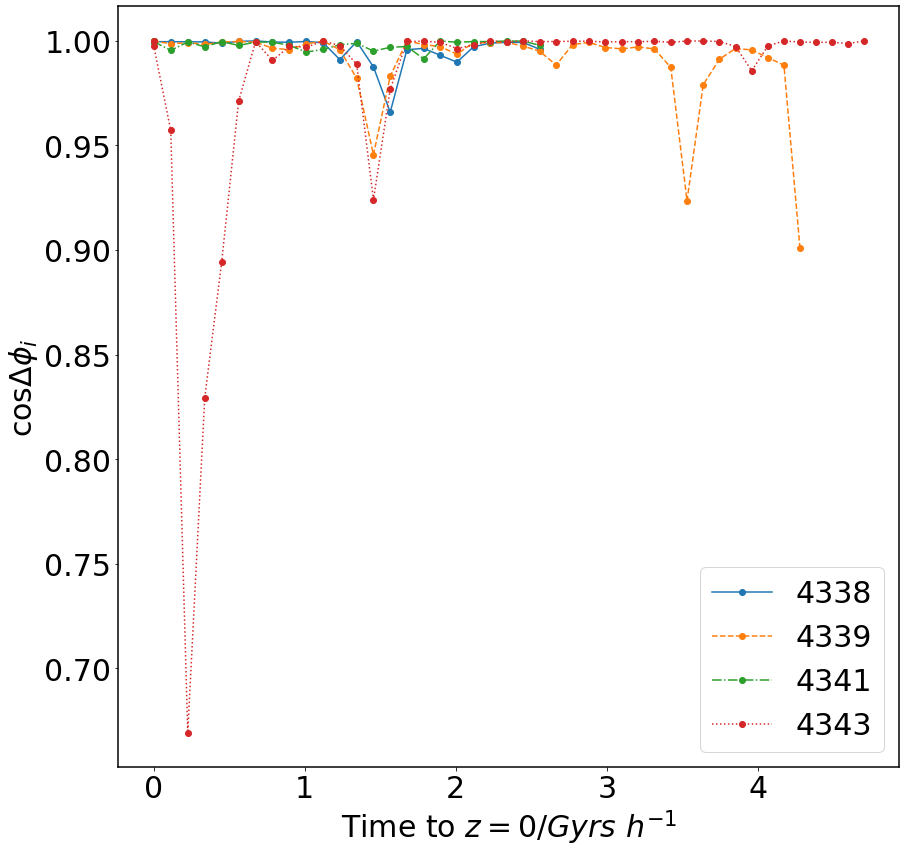

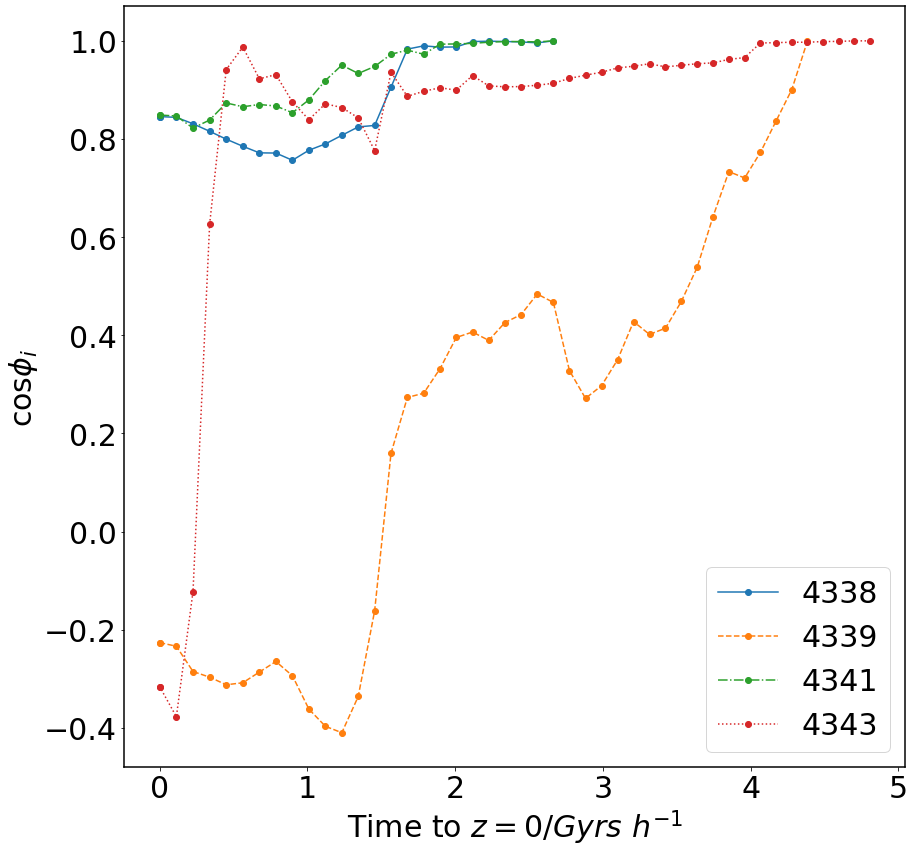

In [24]:
# ok, time vs change
pl.figure(figsize=(14,14))

pl.plot(Time_4338[:-1], cosID_4338, label='4338', marker='o',ls='-')
pl.plot(Time_4339[:-1], cosID_4339, label='4339', marker='o',ls='--')
pl.plot(Time_4341[:-1], cosID_4341, label='4341', marker='o',ls='-.')
pl.plot(Time_4343[:-1], cosID_4343, label='4343', marker='o',ls=':')

pl.legend(loc='best')
pl.ylabel('$\cos \Delta \phi_i$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

pl.figure(figsize=(14,14))

pl.plot(Time_4338, cosI_4338, label='4338', marker='o',ls='-')
pl.plot(Time_4339, cosI_4339, label='4339', marker='o',ls='--')
pl.plot(Time_4341, cosI_4341, label='4341', marker='o',ls='-.')
pl.plot(Time_4343, cosI_4343, label='4343', marker='o',ls=':')

pl.legend(loc='best')
pl.ylabel('$\cos \phi_i$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

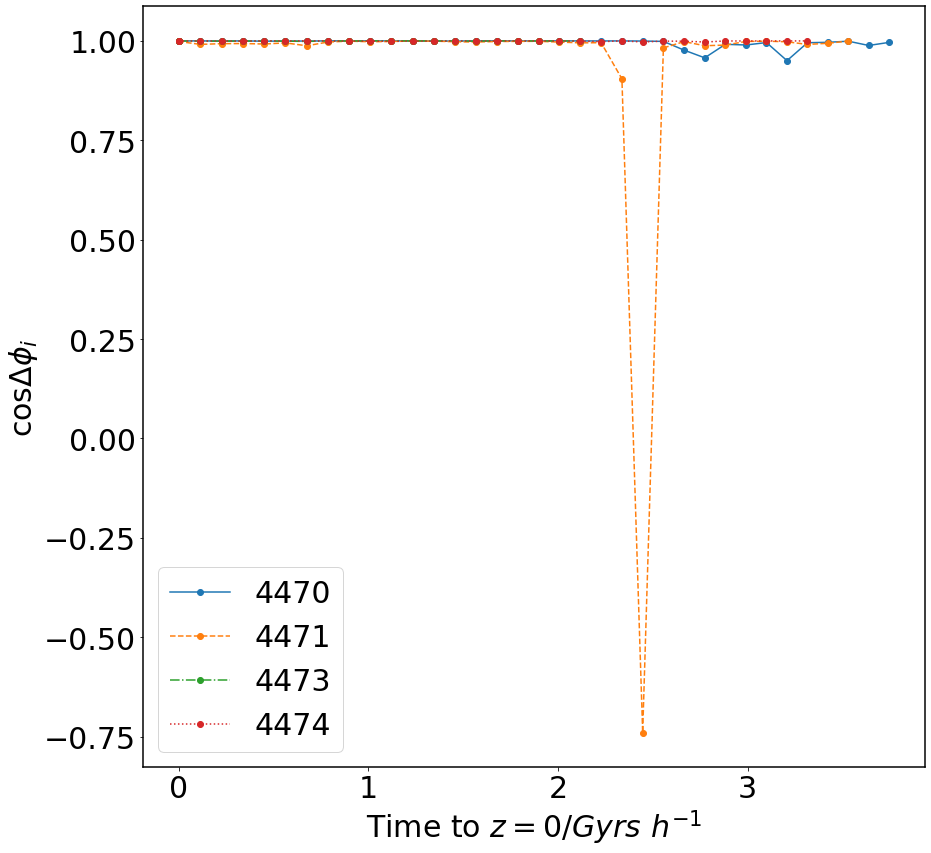

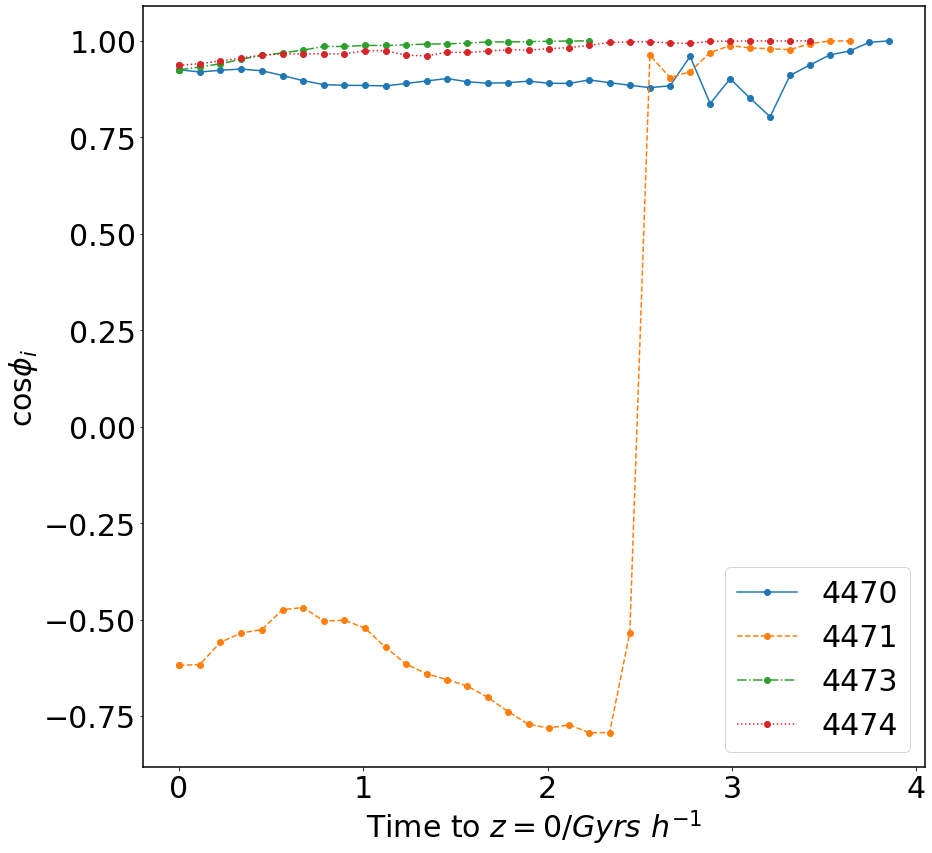

In [25]:
# ok, time vs change
pl.figure(figsize=(14,14))

pl.plot(Time_4470[:-1], cosID_4470, label='4470', marker='o',ls='-')
pl.plot(Time_4471[:-1], cosID_4471, label='4471', marker='o',ls='--')
pl.plot(Time_4473[:-1], cosID_4473, label='4473', marker='o',ls='-.')
pl.plot(Time_4474[:-1], cosID_4474, label='4474', marker='o',ls=':')

pl.legend(loc='best')
pl.ylabel('$\cos \Delta \phi_i$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

pl.figure(figsize=(14,14))

pl.plot(Time_4470, cosI_4470, label='4470', marker='o',ls='-')
pl.plot(Time_4471, cosI_4471, label='4471', marker='o',ls='--')
pl.plot(Time_4473, cosI_4473, label='4473', marker='o',ls='-.')
pl.plot(Time_4474, cosI_4474, label='4474', marker='o',ls=':')

pl.legend(loc='best')
pl.ylabel('$\cos \phi_i$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

In [26]:
# and now for the tidal torque, with smoothing
def smoothRP(RP, n):
    I = np.arange(RP.size)
    
    newRP = np.zeros(I.size)
    for i in I:
        itemp = np.arange(i-n, i+n+1)
        itemp = itemp[np.where((itemp>=0) & (itemp<I[-1]))]
        tRP = RP[itemp]
        
        tRP = tRP[np.where((np.isnan(tRP)==False) & (np.isinf(tRP)==False))]
   
        newRP[i] = np.mean(tRP)
        
    return newRP

Text(0, 0.5, '$\\cos \\Delta \\phi_i$')

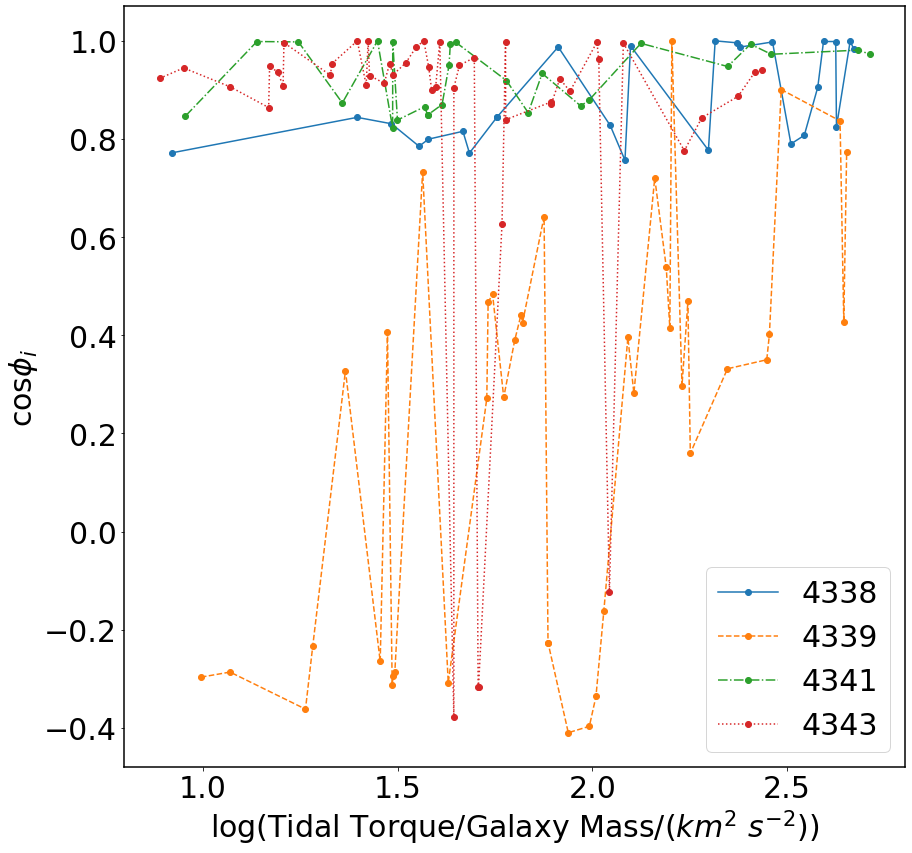

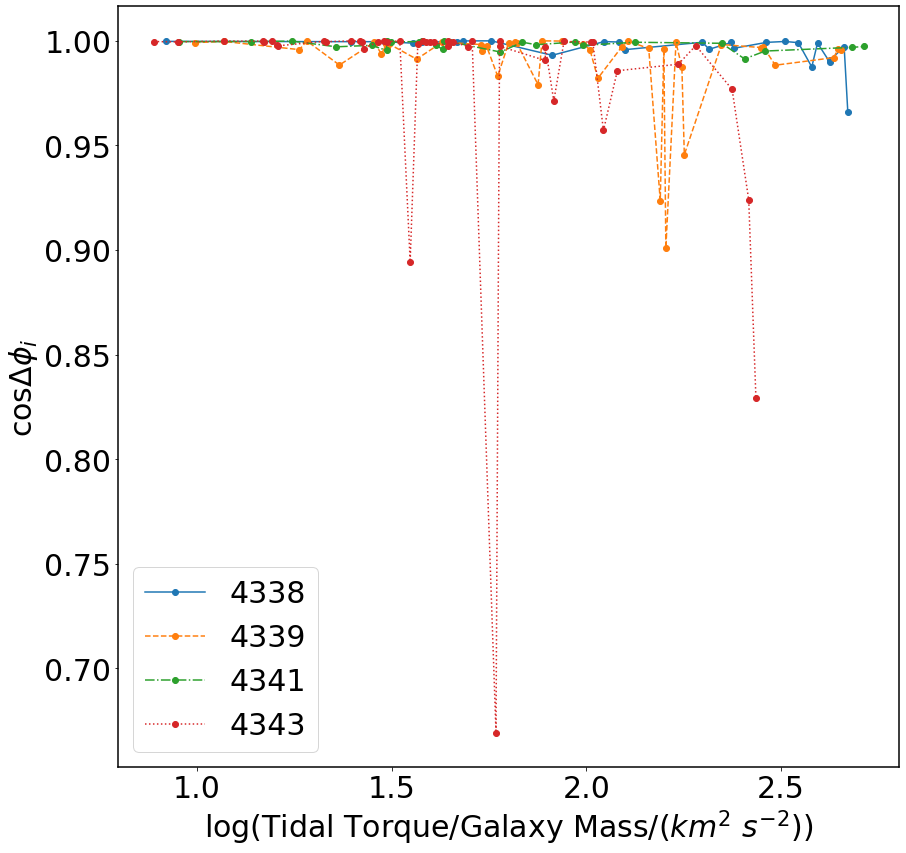

In [27]:
pl.figure(figsize=(14,14))

ii_4338 = np.argsort(TSt_4338/gMass_4338)
ii_4339 = np.argsort(TSt_4339/gMass_4339)
ii_4341 = np.argsort(TSt_4341/gMass_4341)
ii_4343 = np.argsort(TSt_4343/gMass_4343)

pl.plot(np.log10(TSt_4338[ii_4338]/gMass_4338[ii_4338]), cosI_4338[ii_4338], label='4338', marker='o',ls='-')
pl.plot(np.log10(TSt_4339[ii_4339]/gMass_4339[ii_4339]), cosI_4339[ii_4339], label='4339', marker='o',ls='--')
pl.plot(np.log10(TSt_4341[ii_4341]/gMass_4341[ii_4341]), cosI_4341[ii_4341], label='4341', marker='o',ls='-.')
pl.plot(np.log10(TSt_4343[ii_4343]/gMass_4343[ii_4343]), cosI_4343[ii_4343], label='4343', marker='o',ls=':')

pl.legend(loc='best')
pl.xlabel('$\log($Tidal Torque/Galaxy Mass$/(km^2\,\,s^{-2}))$')
pl.ylabel('$\cos \phi_i$')


pl.figure(figsize=(14,14))

ii_4338 = np.argsort(TSt_4338[1:]/gMass_4338[1:])
ii_4339 = np.argsort(TSt_4339[1:]/gMass_4339[1:])
ii_4341 = np.argsort(TSt_4341[1:]/gMass_4341[1:])
ii_4343 = np.argsort(TSt_4343[1:]/gMass_4343[1:])

pl.plot(np.log10(TSt_4338[1:][ii_4338]/gMass_4338[1:][ii_4338]), cosID_4338[ii_4338], label='4338', marker='o',ls='-')
pl.plot(np.log10(TSt_4339[1:][ii_4339]/gMass_4339[1:][ii_4339]), cosID_4339[ii_4339], label='4339', marker='o',ls='--')
pl.plot(np.log10(TSt_4341[1:][ii_4341]/gMass_4341[1:][ii_4341]), cosID_4341[ii_4341], label='4341', marker='o',ls='-.')
pl.plot(np.log10(TSt_4343[1:][ii_4343]/gMass_4343[1:][ii_4343]), cosID_4343[ii_4343], label='4343', marker='o',ls=':')

pl.legend(loc='best')
pl.xlabel('$\log($Tidal Torque/Galaxy Mass$/(km^2\,\,s^{-2}))$')
pl.ylabel('$\cos \Delta \phi_i$')

Text(0, 0.5, '$\\cos \\Delta \\phi_i$')

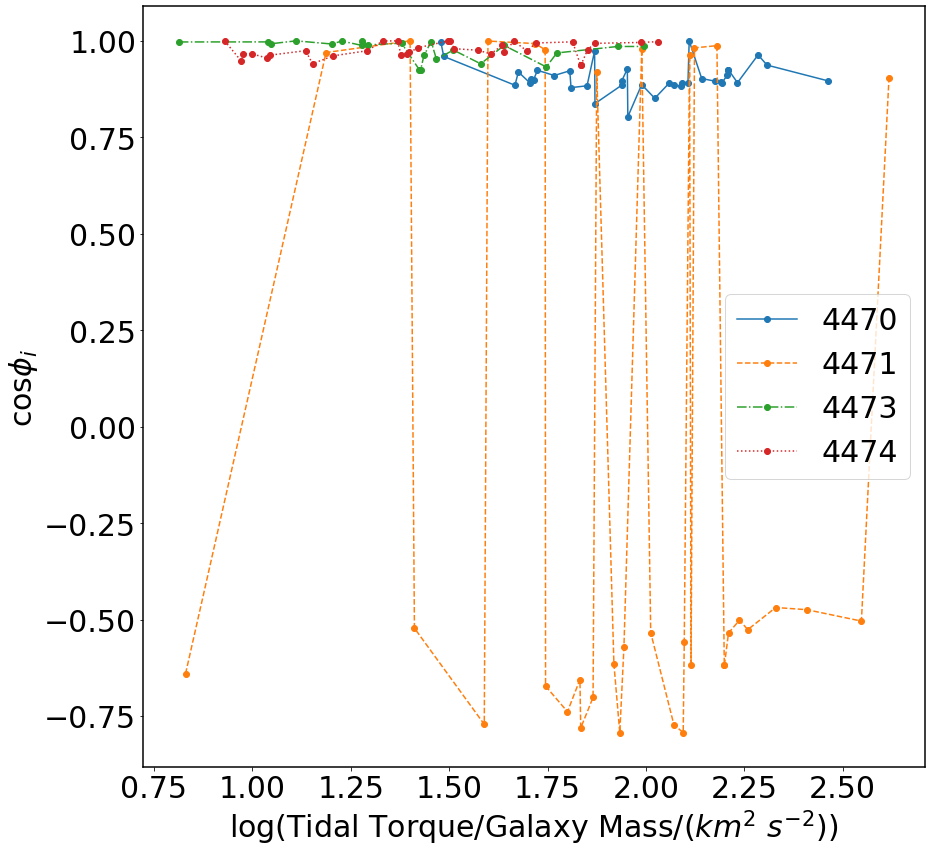

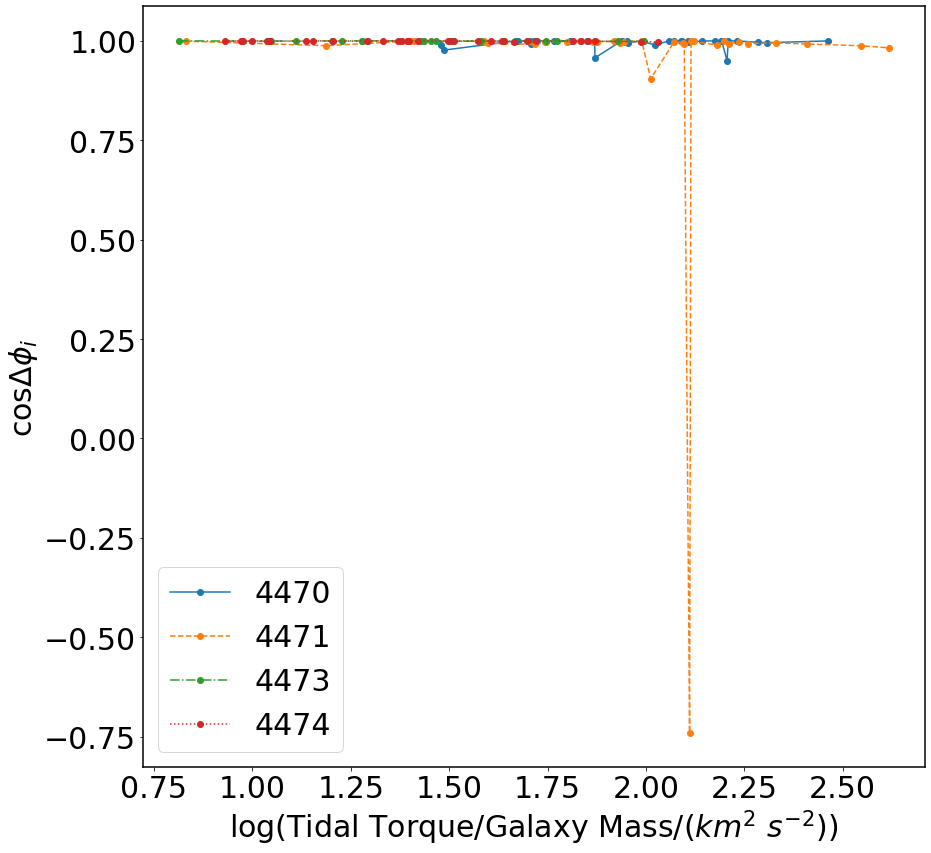

In [28]:
pl.figure(figsize=(14,14))

ii_4470 = np.argsort(TSt_4470/gMass_4470)
ii_4471 = np.argsort(TSt_4471/gMass_4471)
ii_4473 = np.argsort(TSt_4473/gMass_4473)
ii_4474 = np.argsort(TSt_4474/gMass_4474)

pl.plot(np.log10(TSt_4470[ii_4470]/gMass_4470[ii_4470]), cosI_4470[ii_4470], label='4470', marker='o',ls='-')
pl.plot(np.log10(TSt_4471[ii_4471]/gMass_4471[ii_4471]), cosI_4471[ii_4471], label='4471', marker='o',ls='--')
pl.plot(np.log10(TSt_4473[ii_4473]/gMass_4473[ii_4473]), cosI_4473[ii_4473], label='4473', marker='o',ls='-.')
pl.plot(np.log10(TSt_4474[ii_4474]/gMass_4474[ii_4474]), cosI_4474[ii_4474], label='4474', marker='o',ls=':')

pl.legend(loc='best')
pl.xlabel('$\log($Tidal Torque/Galaxy Mass$/(km^2\,\,s^{-2}))$')
pl.ylabel('$\cos \phi_i$')


pl.figure(figsize=(14,14))

ii_4470 = np.argsort(TSt_4470[1:]/gMass_4470[1:])
ii_4471 = np.argsort(TSt_4471[1:]/gMass_4471[1:])
ii_4473 = np.argsort(TSt_4473[1:]/gMass_4473[1:])
ii_4474 = np.argsort(TSt_4474[1:]/gMass_4474[1:])

pl.plot(np.log10(TSt_4470[1:][ii_4470]/gMass_4470[1:][ii_4470]), cosID_4470[ii_4470], label='4470', marker='o',ls='-')
pl.plot(np.log10(TSt_4471[1:][ii_4471]/gMass_4471[1:][ii_4471]), cosID_4471[ii_4471], label='4471', marker='o',ls='--')
pl.plot(np.log10(TSt_4473[1:][ii_4473]/gMass_4473[1:][ii_4473]), cosID_4473[ii_4473], label='4473', marker='o',ls='-.')
pl.plot(np.log10(TSt_4474[1:][ii_4474]/gMass_4474[1:][ii_4474]), cosID_4474[ii_4474], label='4474', marker='o',ls=':')

pl.legend(loc='best')
pl.xlabel('$\log($Tidal Torque/Galaxy Mass$/(km^2\,\,s^{-2}))$')
pl.ylabel('$\cos \Delta \phi_i$')

In [29]:
cosI_4338[0], np.sum(TSt_4338/gMass_4338)

(0.845646, 5171.893618495279)

In [30]:
cosI_4339[0], np.sum(TSt_4339/gMass_4339)

(-0.22624755, 5161.472754076984)

In [31]:
cosI_4341[0], np.sum(TSt_4341/gMass_4341)

(0.84886205, 2758.951570162833)

In [32]:
cosI_4343[0], np.sum(TSt_4343/gMass_4343)

(-0.31737885, 2966.2435571005562)

In [33]:
cosI_4470[0], np.sum(TSt_4470/gMass_4470)

(0.92527944, 4000.0629980567614)

In [34]:
cosI_4471[0], np.sum(TSt_4471/gMass_4471)

(-0.61868465, 4101.390801678201)

In [35]:
cosI_4473[0], np.sum(TSt_4473/gMass_4473)

(0.92479897, 707.2811411062972)

In [36]:
cosI_4474[0], np.sum(TSt_4474/gMass_4474)

(0.93648773, 1227.9520230565556)

In [37]:
(Lmag_4338[0] - Lmag_4338[-1])/Lmag_4338[-1]

-0.033636805

In [38]:
(Lmag_4339[0] - Lmag_4339[-1])/Lmag_4339[-1]

-0.6676804

In [39]:
(Lmag_4341[0] - Lmag_4341[-1])/Lmag_4341[-1]

-0.19455177

In [40]:
(Lmag_4343[0] - Lmag_4343[-1])/Lmag_4343[-1]

-0.8712389

In [41]:
(Lmag_4470[0] - Lmag_4470[-1])/Lmag_4470[-1]

-0.21352866

In [42]:
(Lmag_4471[0] - Lmag_4471[-1])/Lmag_4471[-1]

1.1241345

In [43]:
(Lmag_4473[0] - Lmag_4473[-1])/Lmag_4473[-1]

-0.14083418

In [44]:
(Lmag_4474[0] - Lmag_4474[-1])/Lmag_4474[-1]

-0.09831354

Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

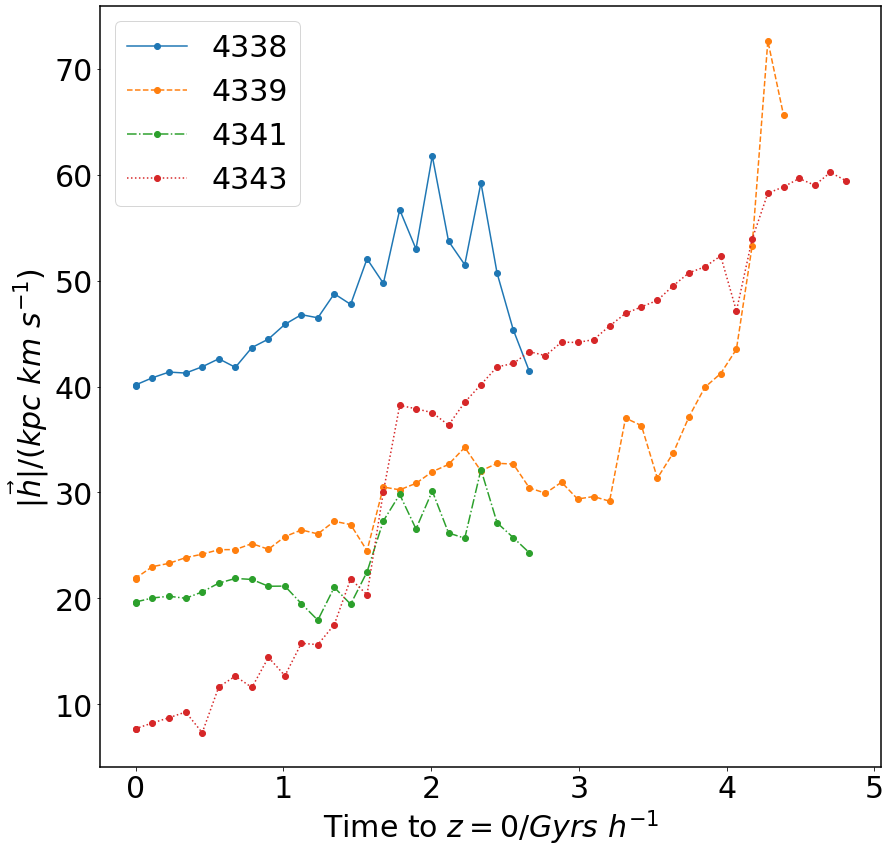

In [45]:
pl.figure(figsize=(14,14))

pl.plot(Time_4338, Lmag_4338, label='4338', marker='o',ls='-')
pl.plot(Time_4339, Lmag_4339, label='4339', marker='o',ls='--')
pl.plot(Time_4341, Lmag_4341, label='4341', marker='o',ls='-.')
pl.plot(Time_4343, Lmag_4343, label='4343', marker='o',ls=':')

pl.legend(loc='best')
pl.ylabel('$| \\vec{h}|/(kpc\,\,km\,\,s^{-1})$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

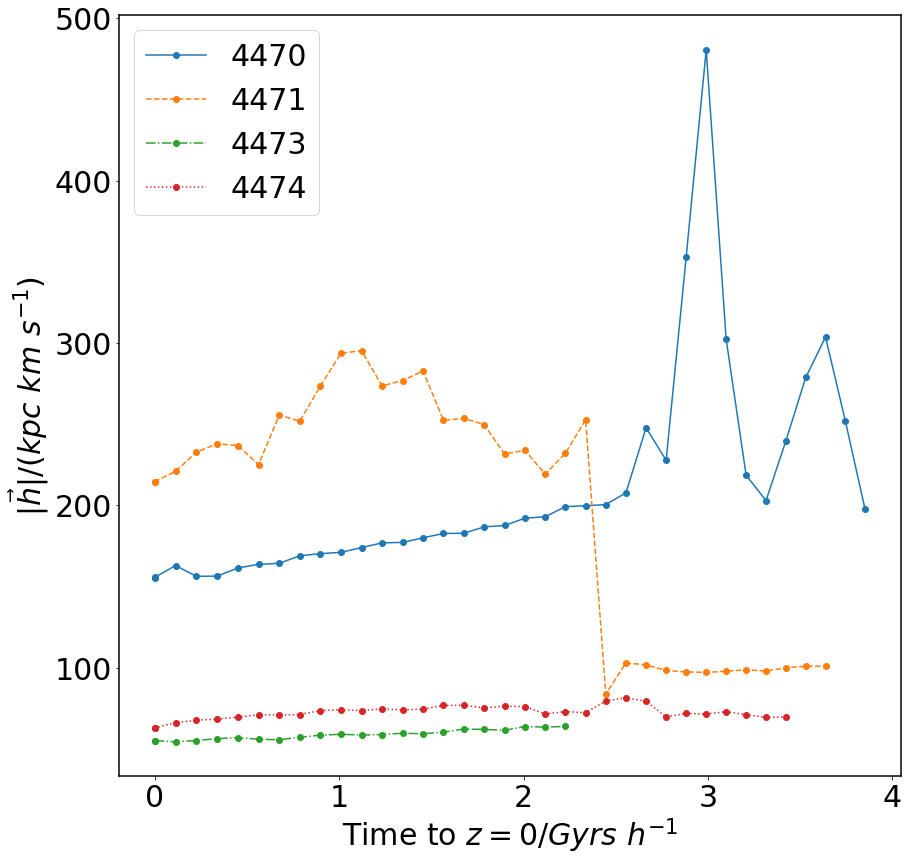

In [46]:
pl.figure(figsize=(14,14))

pl.plot(Time_4470, Lmag_4470, label='4470', marker='o',ls='-')
pl.plot(Time_4471, Lmag_4471, label='4471', marker='o',ls='--')
pl.plot(Time_4473, Lmag_4473, label='4473', marker='o',ls='-.')
pl.plot(Time_4474, Lmag_4474, label='4474', marker='o',ls=':')

pl.legend(loc='best')
pl.ylabel('$| \\vec{h}|/(kpc\,\,km\,\,s^{-1})$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

In [47]:
deltaL_4338 = Lmag_4338[:-1] - Lmag_4338[1:]
deltaL_4339 = Lmag_4339[:-1] - Lmag_4339[1:]
deltaL_4341 = Lmag_4341[:-1] - Lmag_4341[1:]
deltaL_4343 = Lmag_4343[:-1] - Lmag_4343[1:]

deltaL_4470 = Lmag_4470[:-1] - Lmag_4470[1:]
deltaL_4471 = Lmag_4471[:-1] - Lmag_4471[1:]
deltaL_4473 = Lmag_4473[:-1] - Lmag_4473[1:]
deltaL_4474 = Lmag_4474[:-1] - Lmag_4474[1:]

Text(0, 0.5, '$\\Delta | \\vec{h}|/(kpc\\,\\,km\\,\\,s^{-1})$')

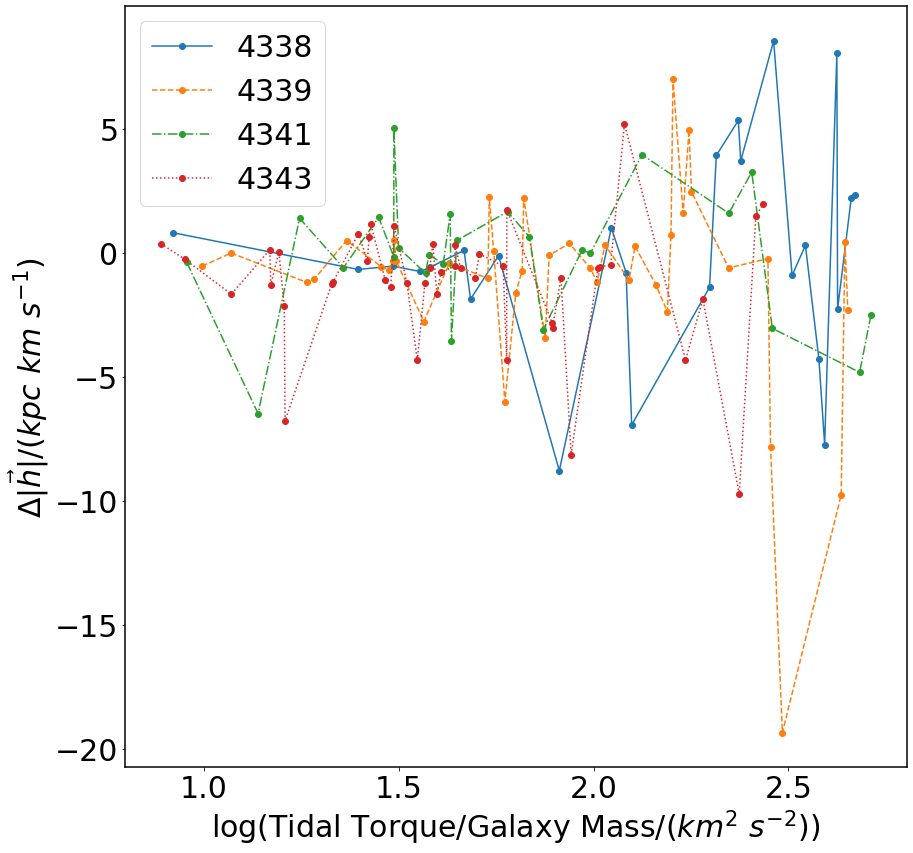

In [48]:
pl.figure(figsize=(14,14))

ii_4338 = np.argsort(TSt_4338[1:]/gMass_4338[1:])
ii_4339 = np.argsort(TSt_4339[1:]/gMass_4339[1:])
ii_4341 = np.argsort(TSt_4341[1:]/gMass_4341[1:])
ii_4343 = np.argsort(TSt_4343[1:]/gMass_4343[1:])

pl.plot(np.log10(TSt_4338[1:][ii_4338]/gMass_4338[1:][ii_4338]), deltaL_4338[ii_4338], label='4338', marker='o',ls='-')
pl.plot(np.log10(TSt_4339[1:][ii_4339]/gMass_4339[1:][ii_4339]), deltaL_4339[ii_4339], label='4339', marker='o',ls='--')
pl.plot(np.log10(TSt_4341[1:][ii_4341]/gMass_4341[1:][ii_4341]), deltaL_4341[ii_4341], label='4341', marker='o',ls='-.')
pl.plot(np.log10(TSt_4343[1:][ii_4343]/gMass_4343[1:][ii_4343]), deltaL_4343[ii_4343], label='4343', marker='o',ls=':')

pl.legend(loc='best')
pl.xlabel('$\log($Tidal Torque/Galaxy Mass$/(km^2\,\,s^{-2}))$')
pl.ylabel('$\Delta | \\vec{h}|/(kpc\,\,km\,\,s^{-1})$')

Text(0, 0.5, '$\\Delta | \\vec{h}|/(kpc\\,\\,km\\,\\,s^{-1})$')

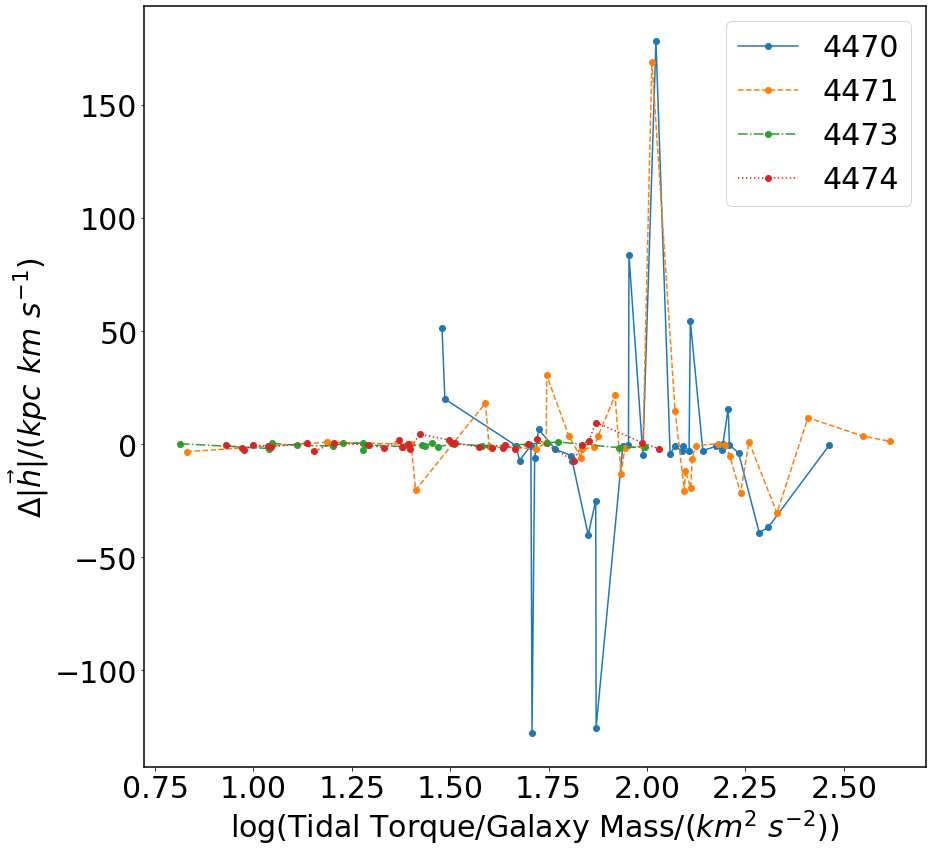

In [49]:
pl.figure(figsize=(14,14))

ii_4338 = np.argsort(TSt_4470[1:]/gMass_4470[1:])
ii_4339 = np.argsort(TSt_4471[1:]/gMass_4471[1:])
ii_4341 = np.argsort(TSt_4473[1:]/gMass_4473[1:])
ii_4343 = np.argsort(TSt_4474[1:]/gMass_4474[1:])

pl.plot(np.log10(TSt_4470[1:][ii_4338]/gMass_4470[1:][ii_4470]), deltaL_4470[ii_4470], label='4470', marker='o',ls='-')
pl.plot(np.log10(TSt_4471[1:][ii_4339]/gMass_4471[1:][ii_4471]), deltaL_4471[ii_4471], label='4471', marker='o',ls='--')
pl.plot(np.log10(TSt_4473[1:][ii_4341]/gMass_4473[1:][ii_4473]), deltaL_4473[ii_4473], label='4473', marker='o',ls='-.')
pl.plot(np.log10(TSt_4474[1:][ii_4343]/gMass_4474[1:][ii_4474]), deltaL_4474[ii_4474], label='4474', marker='o',ls=':')

pl.legend(loc='best')
pl.xlabel('$\log($Tidal Torque/Galaxy Mass$/(km^2\,\,s^{-2}))$')
pl.ylabel('$\Delta | \\vec{h}|/(kpc\,\,km\,\,s^{-1})$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, '$r/r_{200}$')

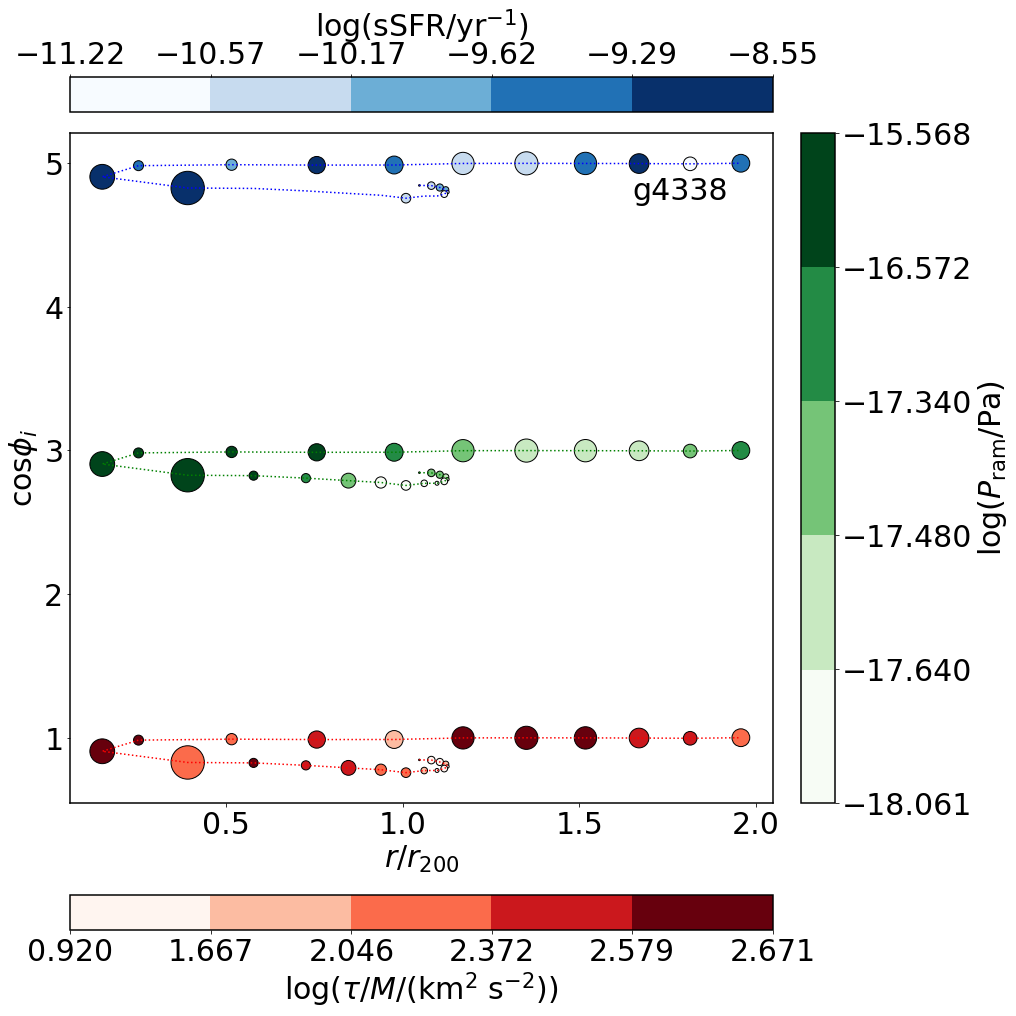

In [50]:
# for each galaxy, the 3 things effects on this

pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4338/gMass_4338), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(dist_4338, cosI_4338, s=Gas_4338/5e5, c=np.log10(TSt_4338/gMass_4338), norm=norm, cmap=cm.Reds, edgecolors='black')
pl.plot(dist_4338, cosI_4338, ls=':', color='red')
barT = pl.colorbar(label='log($\\tau/M$/(km$^2$ s$^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4338), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4338, cosI_4338+2., s=Gas_4338/5e5, c=np.log10(RP_4338), norm=norm2, cmap=cm.Greens, edgecolors='black')
pl.plot(dist_4338, cosI_4338+2, ls=':', color='green')
barRP = pl.colorbar(label='$\log(P_{\\rm ram}$/Pa$)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4338/starMass_4338)

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4338, cosI_4338+4., s=Gas_4338/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues, edgecolors='black')
pl.plot(dist_4338, cosI_4338+4, ls=':', color='blue')
bar3 = pl.colorbar(label='$\log($sSFR/yr$^{-1})$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[1]-deltax/5., ylim[1]-deltay/10., 'g4338')

pl.ylabel('$\cos \phi_i$')
pl.xlabel('$r/r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, '$r/r_{200}$')

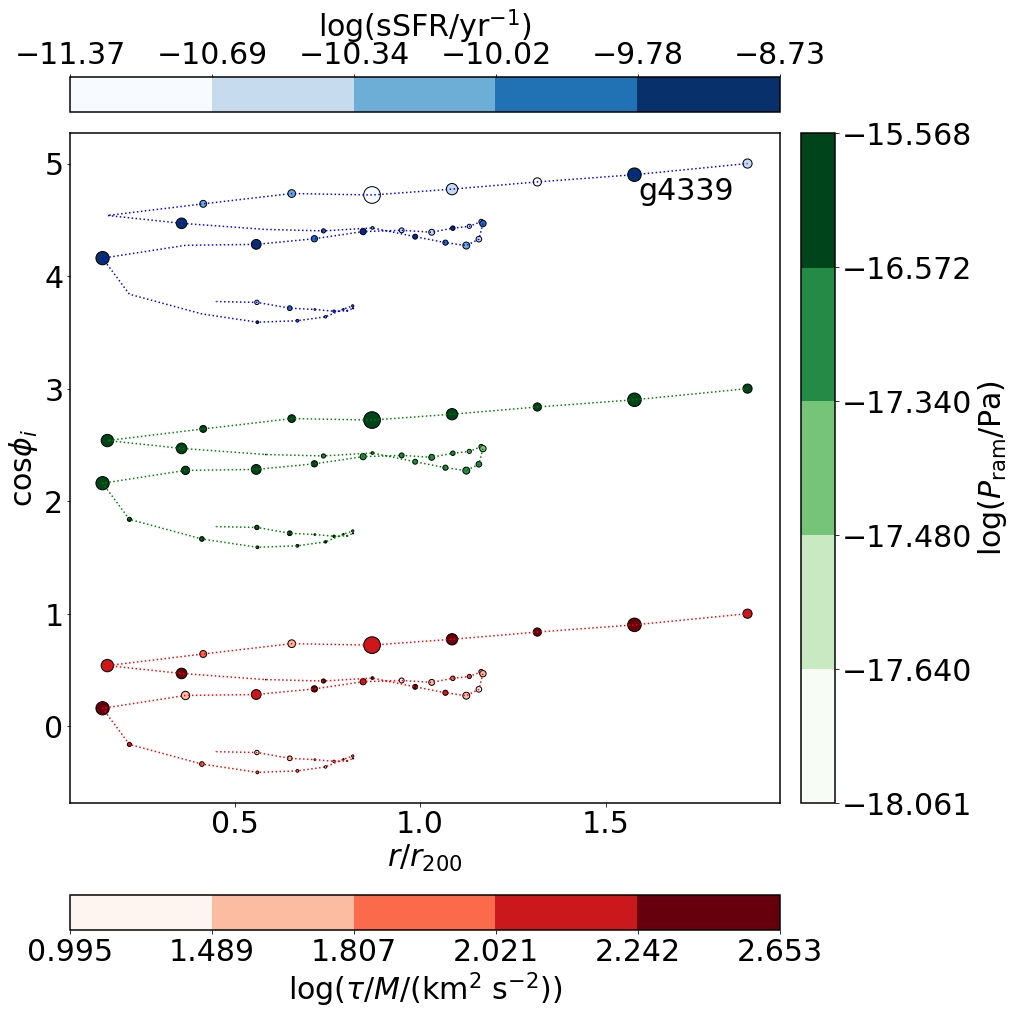

In [51]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4339/gMass_4339), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(dist_4339, cosI_4339, s=Gas_4339/5e5, c=np.log10(TSt_4339/gMass_4339), norm=norm, cmap=cm.Reds, edgecolors='black')
pl.plot(dist_4339, cosI_4339, ls=':', color='red')
barT = pl.colorbar(label='log($\\tau/M$/(km$^2$ s$^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4338), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4339, cosI_4339+2., s=Gas_4339/5e5, c=np.log10(RP_4339), norm=norm2, cmap=cm.Greens, edgecolors='black')
pl.plot(dist_4339, cosI_4339+2, ls=':', color='green')
barRP = pl.colorbar(label='$\log(P_{\\rm ram}$/Pa$)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4339/starMass_4339)

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4339, cosI_4339+4., s=Gas_4339/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues, edgecolors='black')
pl.plot(dist_4339, cosI_4339+4, ls=':', color='blue')
bar3 = pl.colorbar(label='$\log($sSFR/yr$^{-1})$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[1]-deltax/5., ylim[1]-deltay/10., 'g4339')

pl.ylabel('$\cos \phi_i$')
pl.xlabel('$r/r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, '$r/r_{200}$')

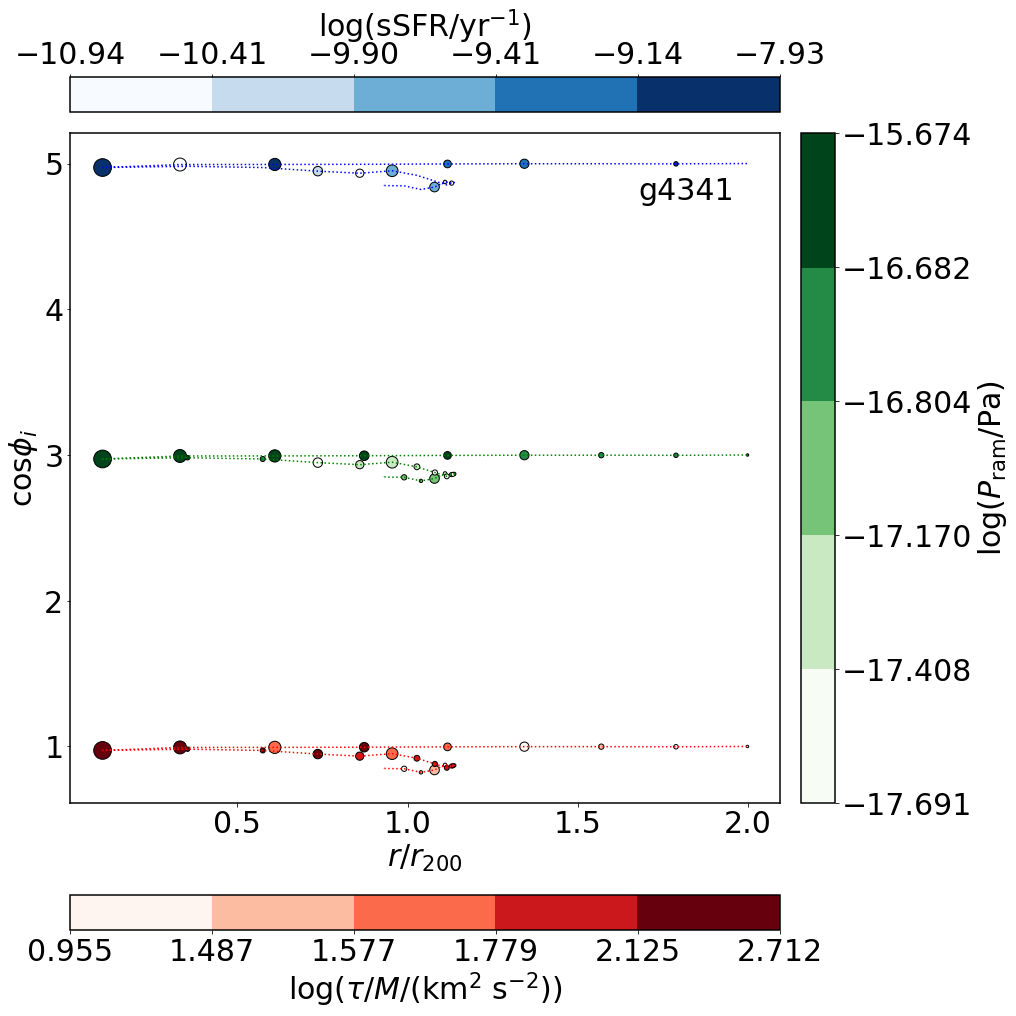

In [52]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4341/gMass_4341), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(dist_4341, cosI_4341, s=Gas_4341/5e5, c=np.log10(TSt_4341/gMass_4341), norm=norm, cmap=cm.Reds, edgecolors='black')
pl.plot(dist_4341, cosI_4341, ls=':', color='red')
barT = pl.colorbar(label='log($\\tau/M$/(km$^2$ s$^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4341), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4341, cosI_4341+2., s=Gas_4341/5e5, c=np.log10(RP_4341), norm=norm2, cmap=cm.Greens, edgecolors='black')
pl.plot(dist_4341, cosI_4341+2, ls=':', color='green')
barRP = pl.colorbar(label='$\log(P_{\\rm ram}$/Pa$)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4341/starMass_4341)

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4341, cosI_4341+4., s=Gas_4341/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues, edgecolors='black')
pl.plot(dist_4341, cosI_4341+4, ls=':', color='blue')
bar3 = pl.colorbar(label='$\log($sSFR/yr$^{-1})$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[1]-deltax/5., ylim[1]-deltay/10., 'g4341')

pl.ylabel('$\cos \phi_i$')
pl.xlabel('$r/r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, '$r/r_{200}$')

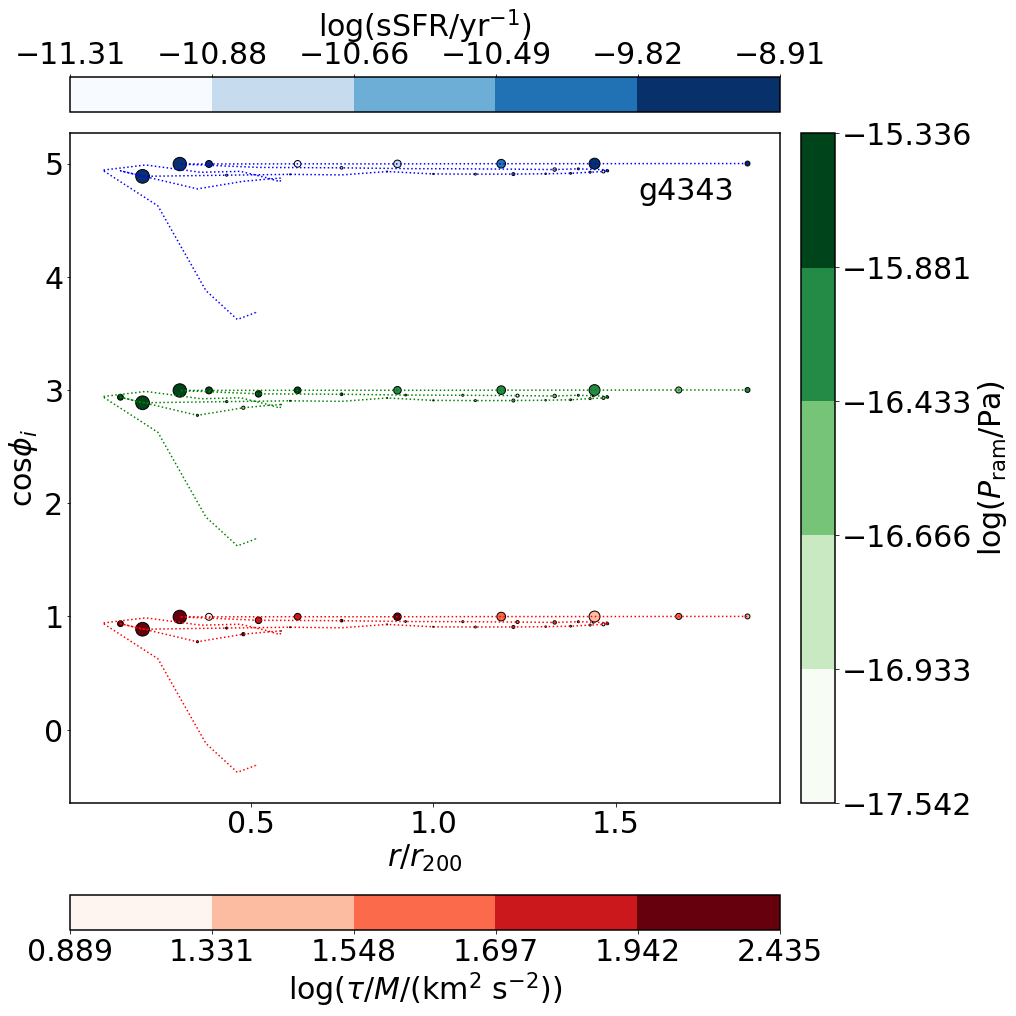

In [53]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4343/gMass_4343), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(dist_4343, cosI_4343, s=Gas_4343/5e5, c=np.log10(TSt_4343/gMass_4343), norm=norm, cmap=cm.Reds, edgecolors='black')
pl.plot(dist_4343, cosI_4343, ls=':', color='red')
barT = pl.colorbar(label='log($\\tau/M$/(km$^2$ s$^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4343), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4343, cosI_4343+2., s=Gas_4343/5e5, c=np.log10(RP_4343), norm=norm2, cmap=cm.Greens, edgecolors='black')
pl.plot(dist_4343, cosI_4343+2, ls=':', color='green')
barRP = pl.colorbar(label='$\log(P_{\\rm ram}$/Pa$)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4343/starMass_4343)

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4343, cosI_4343+4., s=Gas_4343/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues, edgecolors='black')
pl.plot(dist_4343, cosI_4343+4, ls=':', color='blue')
bar3 = pl.colorbar(label='$\log($sSFR/yr$^{-1})$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[1]-deltax/5., ylim[1]-deltay/10., 'g4343')

pl.ylabel('$\cos \phi_i$')
pl.xlabel('$r/r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, '$r/r_{200}$')

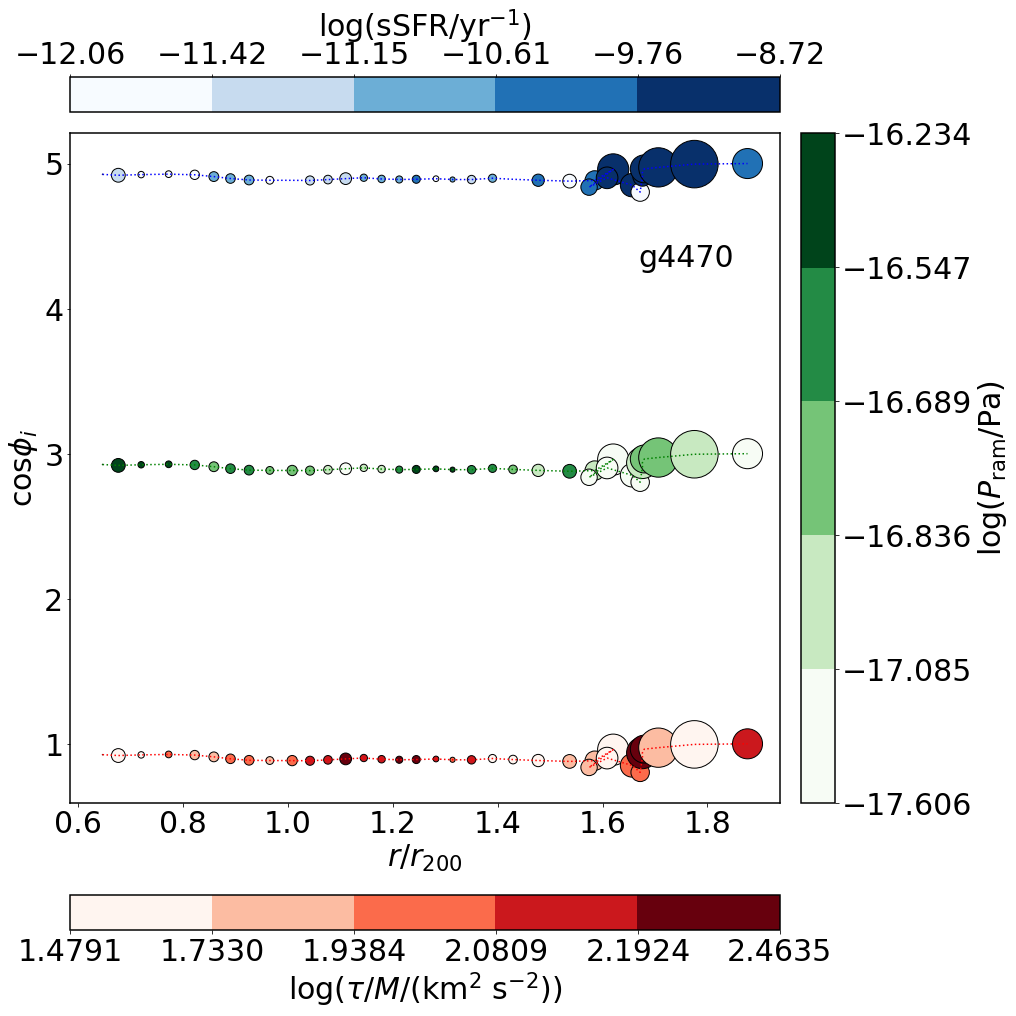

In [54]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4470/gMass_4470), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(dist_4470, cosI_4470, s=Gas_4470/5e5, c=np.log10(TSt_4470/gMass_4470), norm=norm, cmap=cm.Reds, edgecolors='black')
pl.plot(dist_4470, cosI_4470, ls=':', color='red')
barT = pl.colorbar(label='log($\\tau/M$/(km$^2$ s$^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4470), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4470, cosI_4470+2., s=Gas_4470/5e5, c=np.log10(RP_4470), norm=norm2, cmap=cm.Greens, edgecolors='black')
pl.plot(dist_4470, cosI_4470+2, ls=':', color='green')
barRP = pl.colorbar(label='$\log(P_{\\rm ram}$/Pa$)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4470/starMass_4470)

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4470, cosI_4470+4., s=Gas_4470/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues, edgecolors='black')
pl.plot(dist_4470, cosI_4470+4, ls=':', color='blue')
bar3 = pl.colorbar(label='$\log($sSFR/yr$^{-1})$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[1]-deltax/5., ylim[1]-deltay/5., 'g4470')

pl.ylabel('$\cos \phi_i$')
pl.xlabel('$r/r_{200}$')

Text(0.5, 0, '$r/r_{200}$')

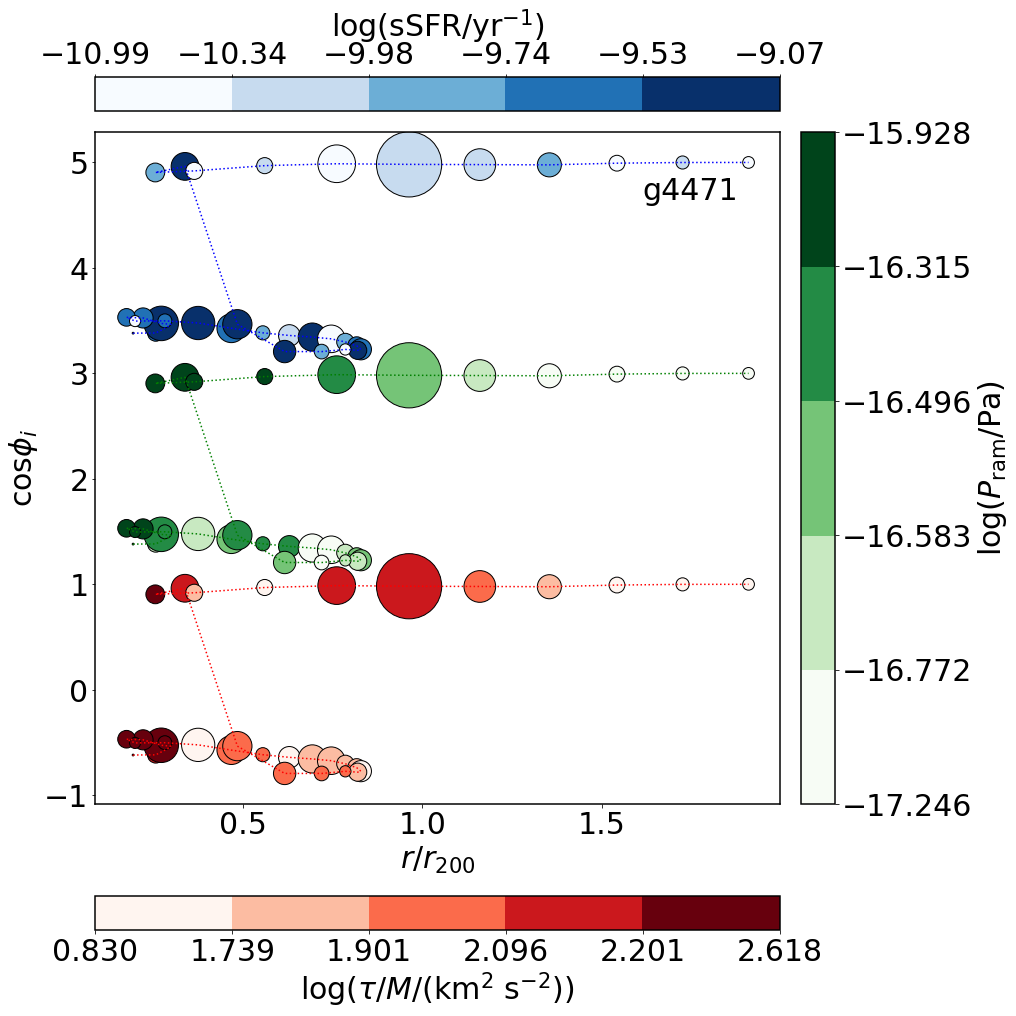

In [55]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4471/gMass_4471), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(dist_4471, cosI_4471, s=Gas_4471/5e5, c=np.log10(TSt_4471/gMass_4471), norm=norm, cmap=cm.Reds, edgecolors='black')
pl.plot(dist_4471, cosI_4471, ls=':', color='red')
barT = pl.colorbar(label='log($\\tau/M$/(km$^2$ s$^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4471), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4471, cosI_4471+2., s=Gas_4471/5e5, c=np.log10(RP_4471), norm=norm2, cmap=cm.Greens, edgecolors='black')
pl.plot(dist_4471, cosI_4471+2, ls=':', color='green')
barRP = pl.colorbar(label='$\log(P_{\\rm ram}$/Pa$)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4471/starMass_4471)

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4471, cosI_4471+4., s=Gas_4471/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues, edgecolors='black')
pl.plot(dist_4471, cosI_4471+4, ls=':', color='blue')
bar3 = pl.colorbar(label='$\log($sSFR/yr$^{-1})$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[1]-deltax/5., ylim[1]-deltay/10., 'g4471')

pl.ylabel('$\cos \phi_i$')
pl.xlabel('$r/r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, '$r/r_{200}$')

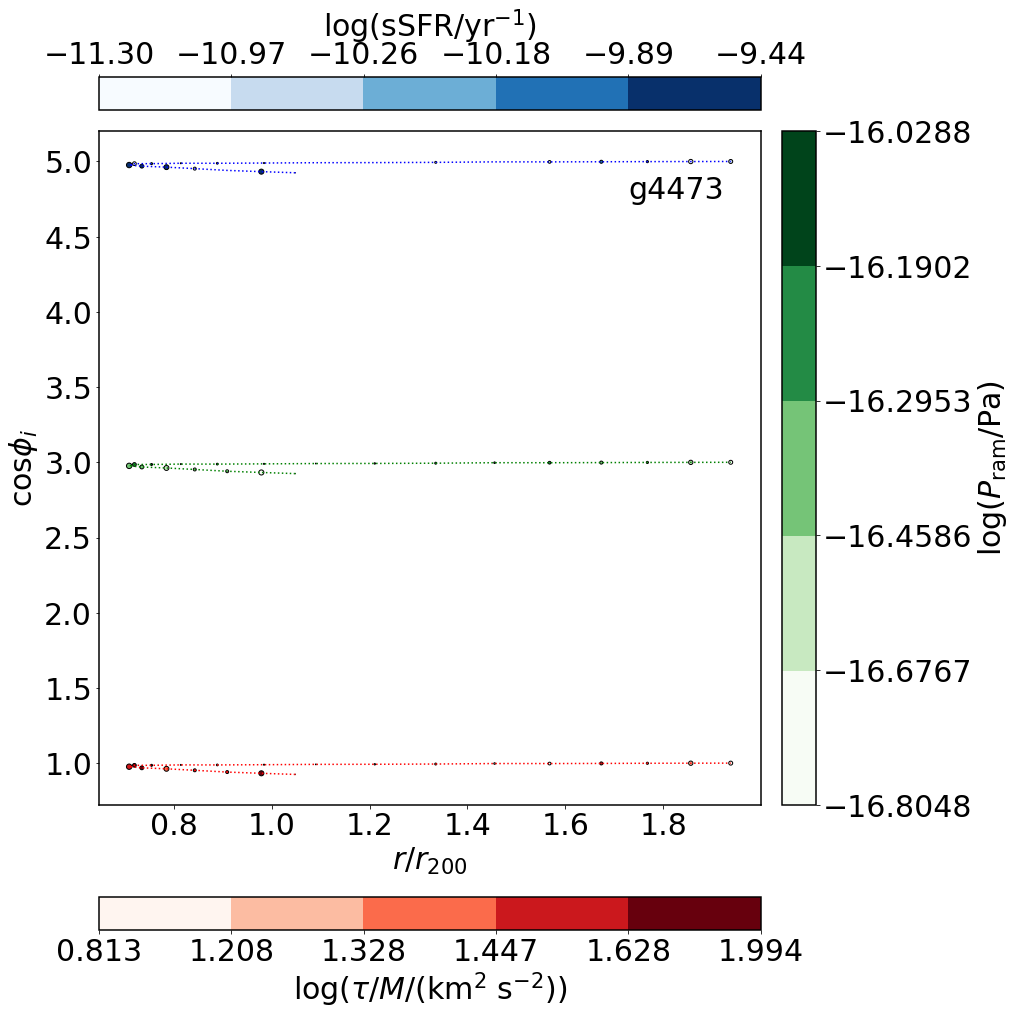

In [56]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4473/gMass_4473), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(dist_4473, cosI_4473, s=Gas_4473/5e5, c=np.log10(TSt_4473/gMass_4473), norm=norm, cmap=cm.Reds, edgecolors='black')
pl.plot(dist_4473, cosI_4473, ls=':', color='red')
barT = pl.colorbar(label='log($\\tau/M$/(km$^2$ s$^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4473), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4473, cosI_4473+2., s=Gas_4473/5e5, c=np.log10(RP_4473), norm=norm2, cmap=cm.Greens, edgecolors='black')
pl.plot(dist_4473, cosI_4473+2, ls=':', color='green')
barRP = pl.colorbar(label='$\log(P_{\\rm ram}$/Pa$)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4473/starMass_4473)

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4473, cosI_4473+4., s=Gas_4473/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues, edgecolors='black')
pl.plot(dist_4473, cosI_4473+4, ls=':', color='blue')
bar3 = pl.colorbar(label='$\log($sSFR/yr$^{-1})$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[1]-deltax/5., ylim[1]-deltay/10., 'g4473')

pl.ylabel('$\cos \phi_i$')
pl.xlabel('$r/r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, '$r/r_{200}$')

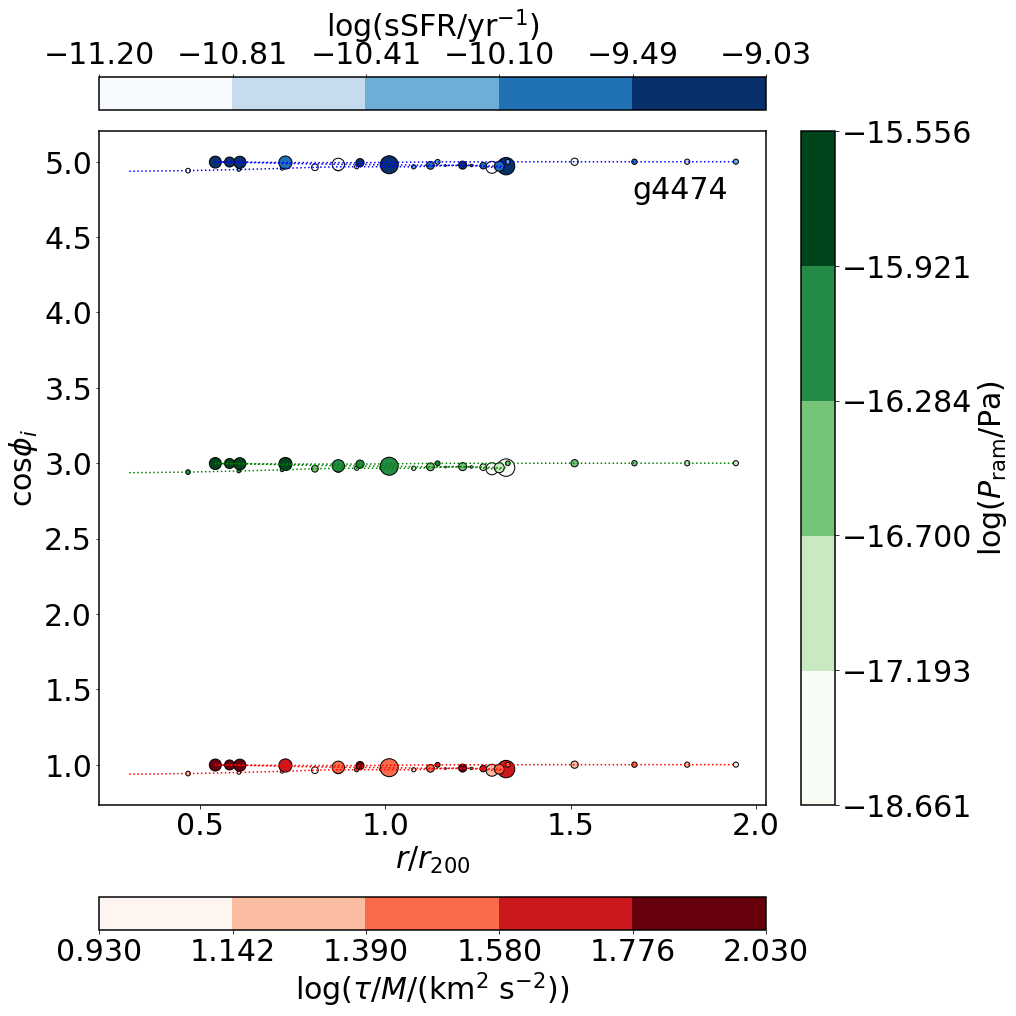

In [57]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4474/gMass_4474), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(dist_4474, cosI_4474, s=Gas_4474/5e5, c=np.log10(TSt_4474/gMass_4474), norm=norm, cmap=cm.Reds, edgecolors='black')
pl.plot(dist_4474, cosI_4474, ls=':', color='red')
barT = pl.colorbar(label='log($\\tau/M$/(km$^2$ s$^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4474), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4474, cosI_4474+2., s=Gas_4474/5e5, c=np.log10(RP_4474), norm=norm2, cmap=cm.Greens, edgecolors='black')
pl.plot(dist_4474, cosI_4474+2, ls=':', color='green')
barRP = pl.colorbar(label='$\log(P_{\\rm ram}$/Pa$)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4474/starMass_4474)

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4474, cosI_4474+4., s=Gas_4474/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues, edgecolors='black')
pl.plot(dist_4474, cosI_4474+4, ls=':', color='blue')
bar3 = pl.colorbar(label='$\log($sSFR/yr$^{-1})$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[1]-deltax/5., ylim[1]-deltay/10., 'g4474')

pl.ylabel('$\cos \phi_i$')
pl.xlabel('$r/r_{200}$')

In [58]:
# ok, lets take a look at the relation between change of orientation and \dot{M}, first lest calculate \dot{M}

def Mdot(gal, central):
    zlist = []
    Mass = []
    
    uniqueID = int(127*1e6+gal)
    stree = networkx.dfs_tree(trees, str(uniqueID))
    mtree = get_main_branch_unique_ids(stree, str(uniqueID))
    
    uniqueIDC = int(127*1e6+central)
    streeC = networkx.dfs_tree(trees, str(uniqueIDC))
    mtreeC = get_main_branch_unique_ids(streeC, str(uniqueIDC))
    
    group = sim['SnapNumber_128/SubGroups/GroupNumber'][central]
    r200 = sim['SnapNumber_128/Groups/Group_R_Crit200'][group]
    
    for m, mC in zip(mtree, mtreeC):
        snap, idd = split_unique_id(int(m))
        snap, iddC = split_unique_id(int(mC))
        
        posG = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][idd]
        posC = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][iddC]
        
        delta = posG-posC
        dist = np.sqrt(np.sum(delta**2))/r200
        
        if dist>2:
            break
            
        # all mas or just, lets go for all, an only gas
        offs = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snap)][idd].astype('int')
        gasM = sim['SnapNumber_{}/PartType0/Masses'.format(snap)][offs[0]:offs[1]]
        GM = np.sum(gasM)*1e10
        
        z = sim['SnapNumber_{}/Header/Redshift'.format(snap)][()]
        Mass.append(GM)
        zlist.append(z)
        
    Mass = np.array(Mass)
    zlist = np.array(zlist)
    
    Timelist = Cosmo.lookback_time(zlist).value
    
    DeltaM = Mass[:-1] - Mass[1:]
    deltaTime = Timelist[1:] - Timelist[:-1]
    return DeltaM/deltaTime
#     return DeltaM

In [59]:
# lest test this

deltaM_4338 = Mdot(4338, 4337)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


In [60]:
deltaM_4339 = Mdot(4339, 4337)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [61]:
deltaM_4341 = Mdot(4341, 4337)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [62]:
deltaM_4343 = Mdot(4343, 4337)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


In [63]:
deltaM_4470 = Mdot(4470, 4469)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


In [64]:
deltaM_4471 = Mdot(4471, 4469)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


In [65]:
deltaM_4473 = Mdot(4473, 4469)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


In [66]:
deltaM_4474 = Mdot(4474, 4469)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, '$\\cos \\Delta \\phi_i$')

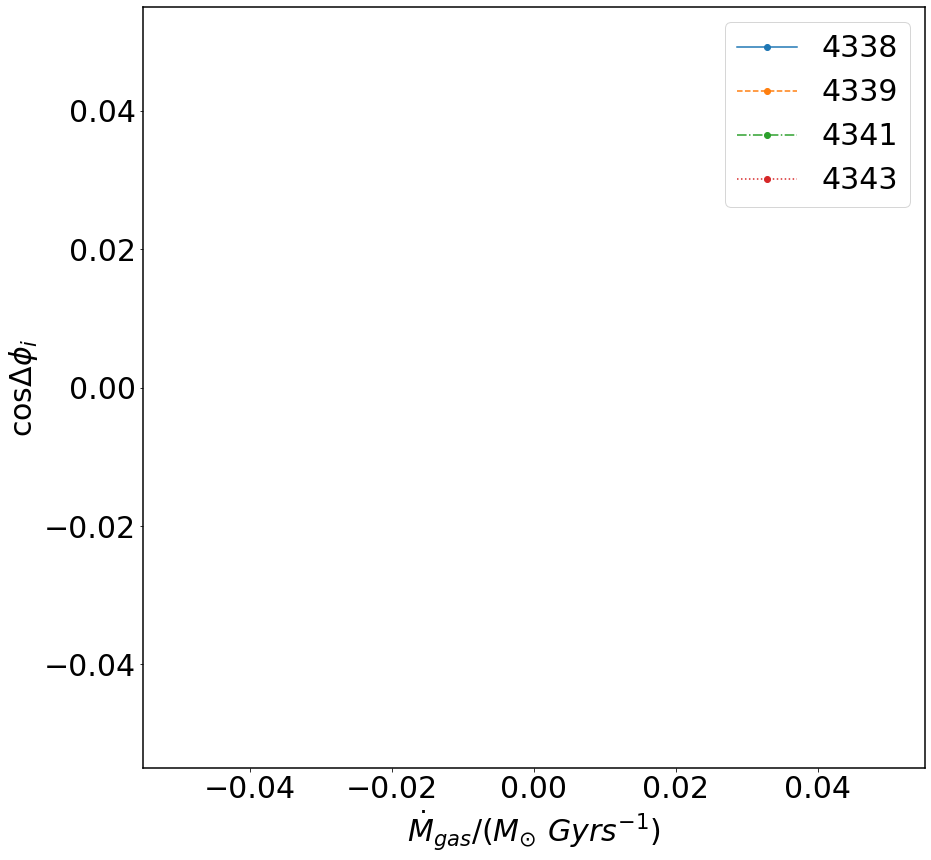

In [67]:
pl.figure(figsize=(14,14))

ii_4338 = np.argsort(deltaM_4338)
ii_4339 = np.argsort(deltaM_4339)
ii_4341 = np.argsort(deltaM_4341)
ii_4343 = np.argsort(deltaM_4343)

pl.plot(deltaM_4338[ii_4338], cosID_4338[ii_4338], label='4338', marker='o',ls='-')
pl.plot(deltaM_4339[ii_4339], cosID_4339[ii_4339], label='4339', marker='o',ls='--')
pl.plot(deltaM_4341[ii_4341], cosID_4341[ii_4341], label='4341', marker='o',ls='-.')
pl.plot(deltaM_4343[ii_4343], cosID_4343[ii_4343], label='4343', marker='o',ls=':')

pl.legend(loc='best')
pl.xlabel('$\dot{M}_{gas}/(M_{\odot}\,\,Gyrs^{-1})$')
pl.ylabel('$\cos \Delta \phi_i$')

Text(0, 0.5, '$\\cos \\Delta \\phi_i$')

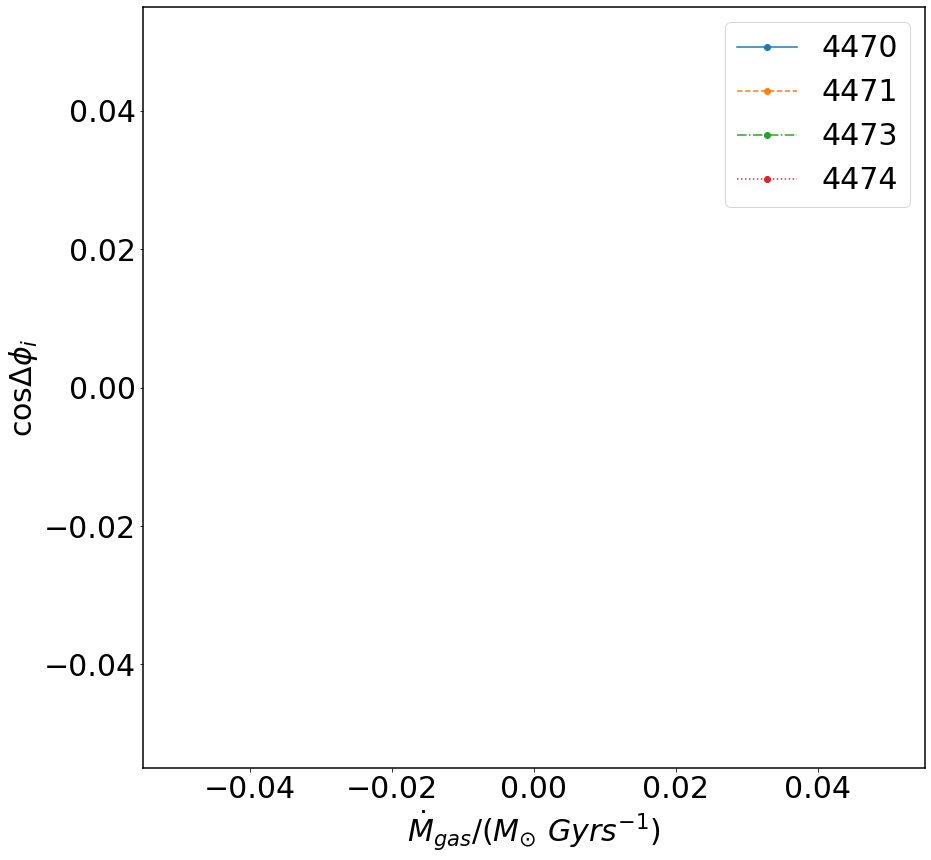

In [68]:
# ok,lets compare this with teh angle cosI, ese nomas, just in case

pl.figure(figsize=(14,14))

ii_4470 = np.argsort(deltaM_4470)
ii_4471 = np.argsort(deltaM_4471)
ii_4473 = np.argsort(deltaM_4473)
ii_4474 = np.argsort(deltaM_4474)

pl.plot(deltaM_4470[ii_4470], cosID_4470[ii_4470], label='4470', marker='o',ls='-')
pl.plot(deltaM_4471[ii_4471], cosID_4471[ii_4471], label='4471', marker='o',ls='--')
pl.plot(deltaM_4473[ii_4473], cosID_4473[ii_4473], label='4473', marker='o',ls='-.')
pl.plot(deltaM_4474[ii_4474], cosID_4474[ii_4474], label='4474', marker='o',ls=':')

pl.legend(loc='best')
pl.xlabel('$\dot{M}_{gas}/(M_{\odot}\,\,Gyrs^{-1})$')
pl.ylabel('$\cos \Delta \phi_i$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'distance to the centre/$r_{200}$')

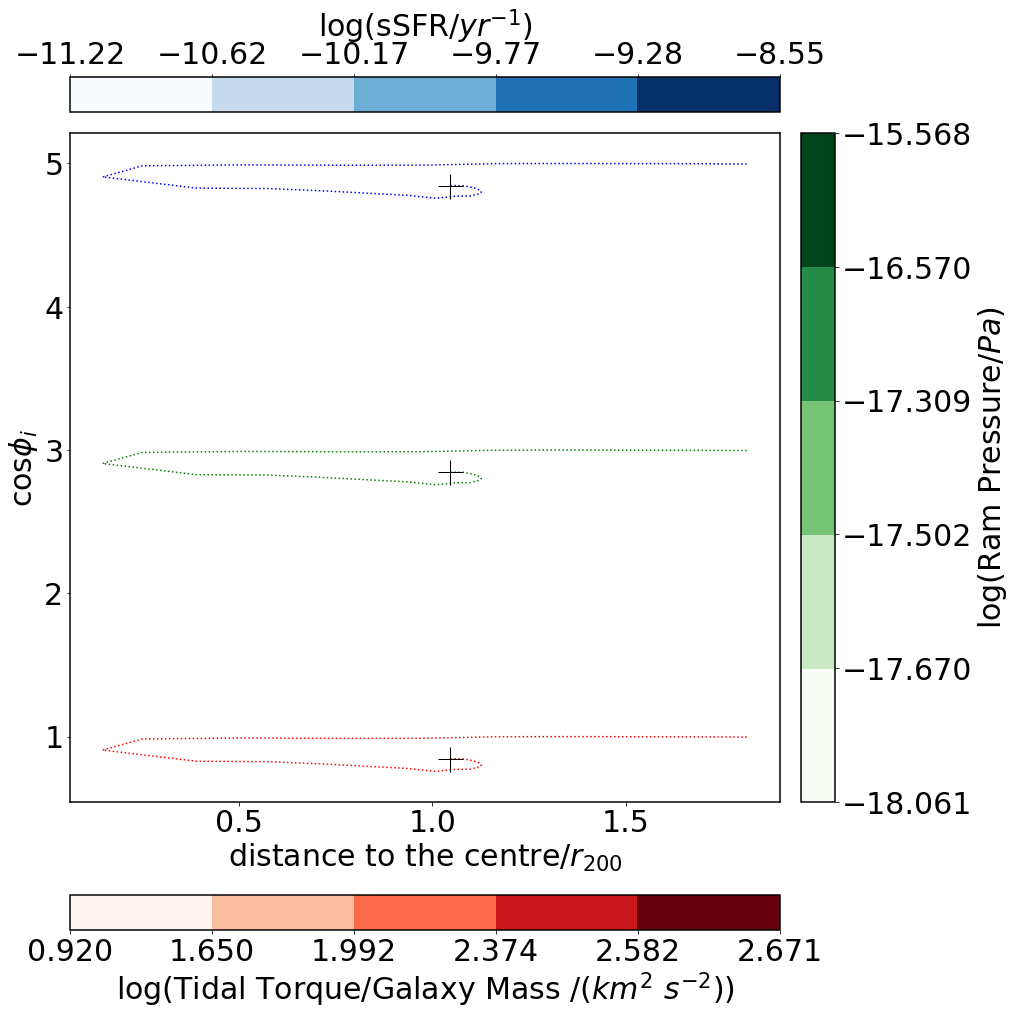

In [69]:
#ok.lets see step by step, all right

pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4338[:-1]/gMass_4338[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

ipos = np.where(deltaM_4338>0.)

pl.scatter(dist_4338[:-1], cosI_4338[:-1], s=np.abs(deltaM_4338/5e6), c=np.log10(TSt_4338[:-1]/gMass_4338[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(dist_4338[:-1], cosI_4338[:-1], ls=':', color='red')
pl.plot(dist_4338[:-1][ipos], cosI_4338[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4338[:-1]), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4338[:-1], cosI_4338[:-1]+2., s=np.abs(deltaM_4338/5e6), c=np.log10(RP_4338[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(dist_4338[:-1], cosI_4338[:-1]+2, ls=':', color='green')
pl.plot(dist_4338[:-1][ipos], cosI_4338[:-1][ipos]+2, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4338[:-1]/starMass_4338[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4338[:-1], cosI_4338[:-1]+4., s=np.abs(deltaM_4338/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(dist_4338[:-1], cosI_4338[:-1]+4, ls=':', color='blue')
pl.plot(dist_4338[:-1][ipos], cosI_4338[:-1][ipos]+4, marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('$\cos \phi_i$')
pl.xlabel('distance to the centre/$r_{200}$')

In [70]:
np.max(np.abs(deltaM_4338)/2e8)

inf

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'distance to the centre/$r_{200}$')

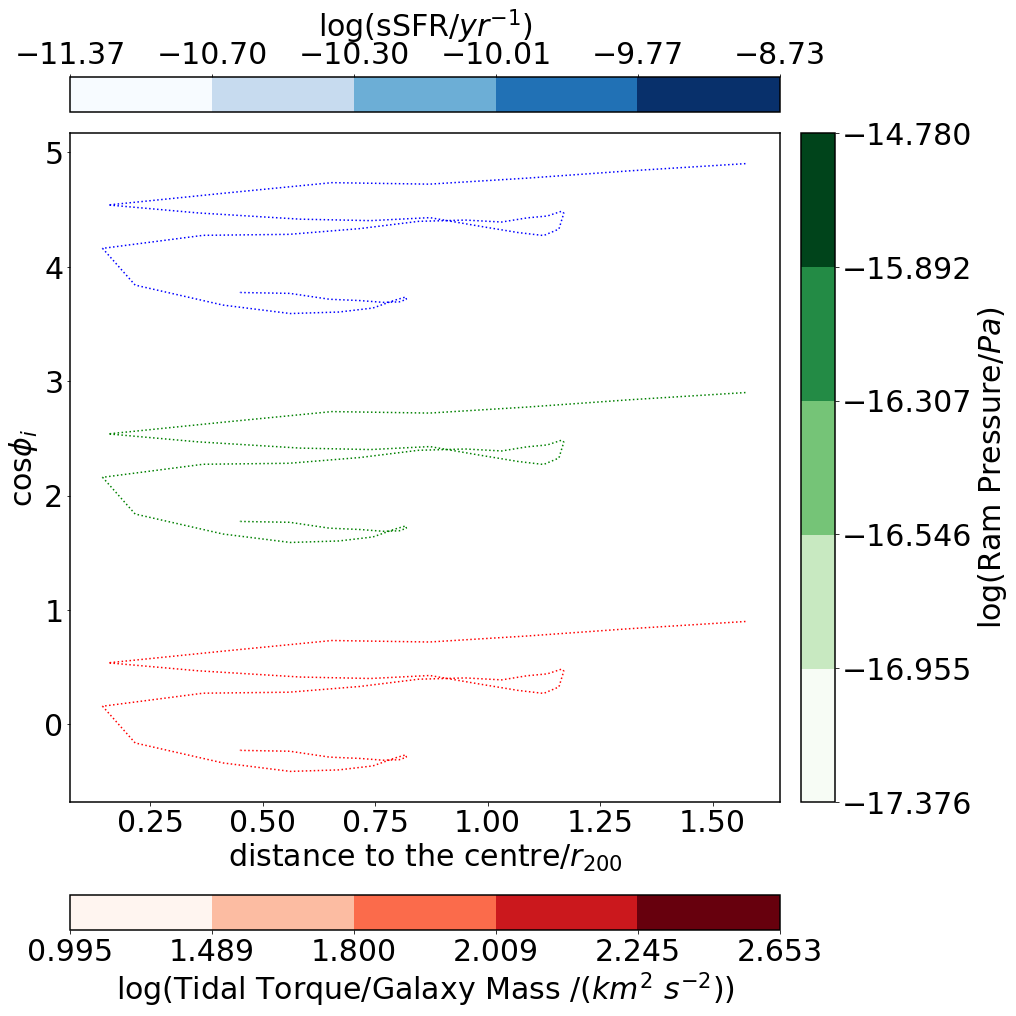

In [71]:

pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4339[:-1]/gMass_4339[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

ipos = np.where(deltaM_4339>0.)

pl.scatter(dist_4339[:-1], cosI_4339[:-1], s=np.abs(deltaM_4339/5e6), c=np.log10(TSt_4339[:-1]/gMass_4339[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(dist_4339[:-1], cosI_4339[:-1], ls=':', color='red')
pl.plot(dist_4339[:-1][ipos], cosI_4339[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4339[:-1]), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4339[:-1], cosI_4339[:-1]+2., s=np.abs(deltaM_4339/5e6), c=np.log10(RP_4339[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(dist_4339[:-1], cosI_4339[:-1]+2, ls=':', color='green')
pl.plot(dist_4339[:-1][ipos], cosI_4339[:-1][ipos]+2, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4339[:-1]/starMass_4339[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4339[:-1], cosI_4339[:-1]+4., s=np.abs(deltaM_4339/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(dist_4339[:-1], cosI_4339[:-1]+4, ls=':', color='blue')
pl.plot(dist_4339[:-1][ipos], cosI_4339[:-1][ipos]+4, marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('$\cos \phi_i$')
pl.xlabel('distance to the centre/$r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'distance to the centre/$r_{200}$')

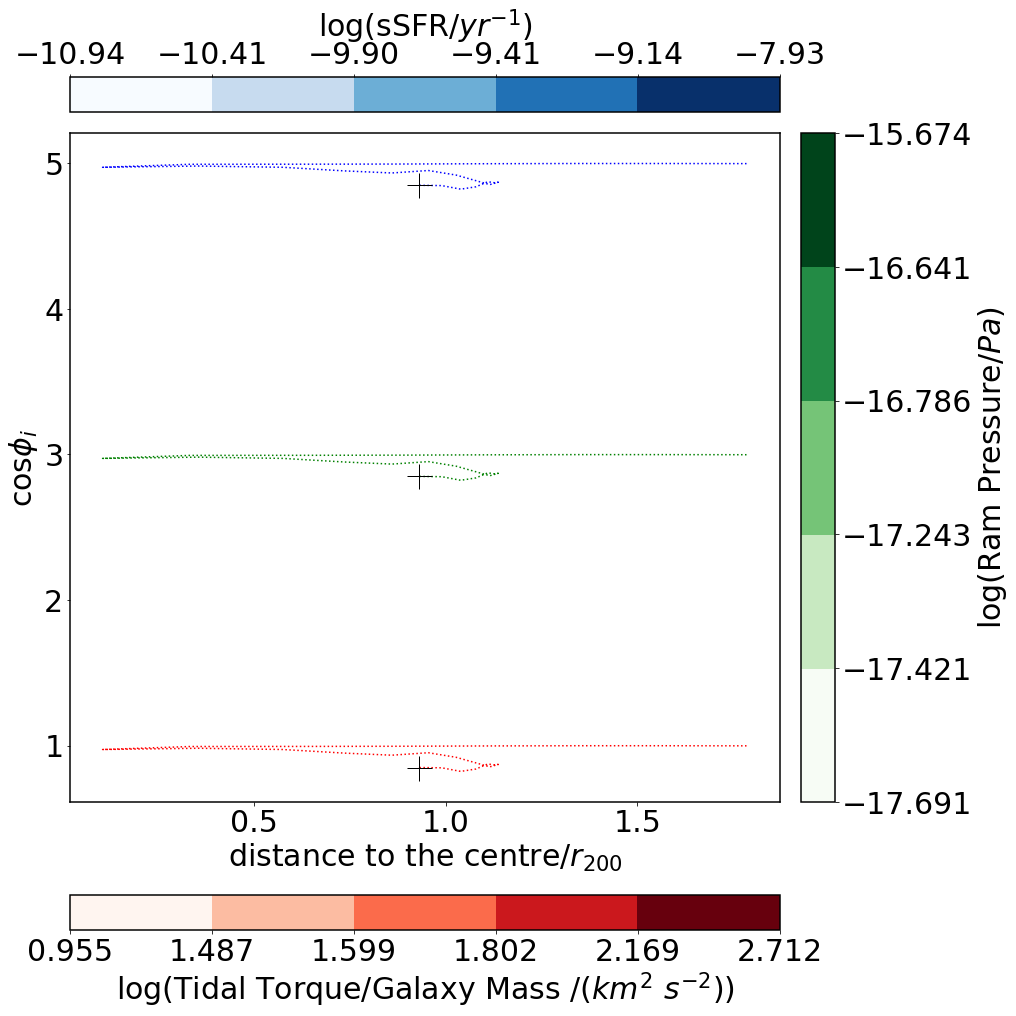

In [72]:

pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4341[:-1]/gMass_4341[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

ipos = np.where(deltaM_4338>0.)

pl.scatter(dist_4341[:-1], cosI_4341[:-1], s=np.abs(deltaM_4341/5e6), c=np.log10(TSt_4341[:-1]/gMass_4341[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(dist_4341[:-1], cosI_4341[:-1], ls=':', color='red')
pl.plot(dist_4341[:-1][ipos], cosI_4341[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4341[:-1]), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4341[:-1], cosI_4341[:-1]+2., s=np.abs(deltaM_4341/5e6), c=np.log10(RP_4341[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(dist_4341[:-1], cosI_4341[:-1]+2, ls=':', color='green')
pl.plot(dist_4341[:-1][ipos], cosI_4341[:-1][ipos]+2, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4341[:-1]/starMass_4341[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4341[:-1], cosI_4341[:-1]+4., s=np.abs(deltaM_4341/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(dist_4341[:-1], cosI_4341[:-1]+4, ls=':', color='blue')
pl.plot(dist_4341[:-1][ipos], cosI_4341[:-1][ipos]+4, marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('$\cos \phi_i$')
pl.xlabel('distance to the centre/$r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'distance to the centre/$r_{200}$')

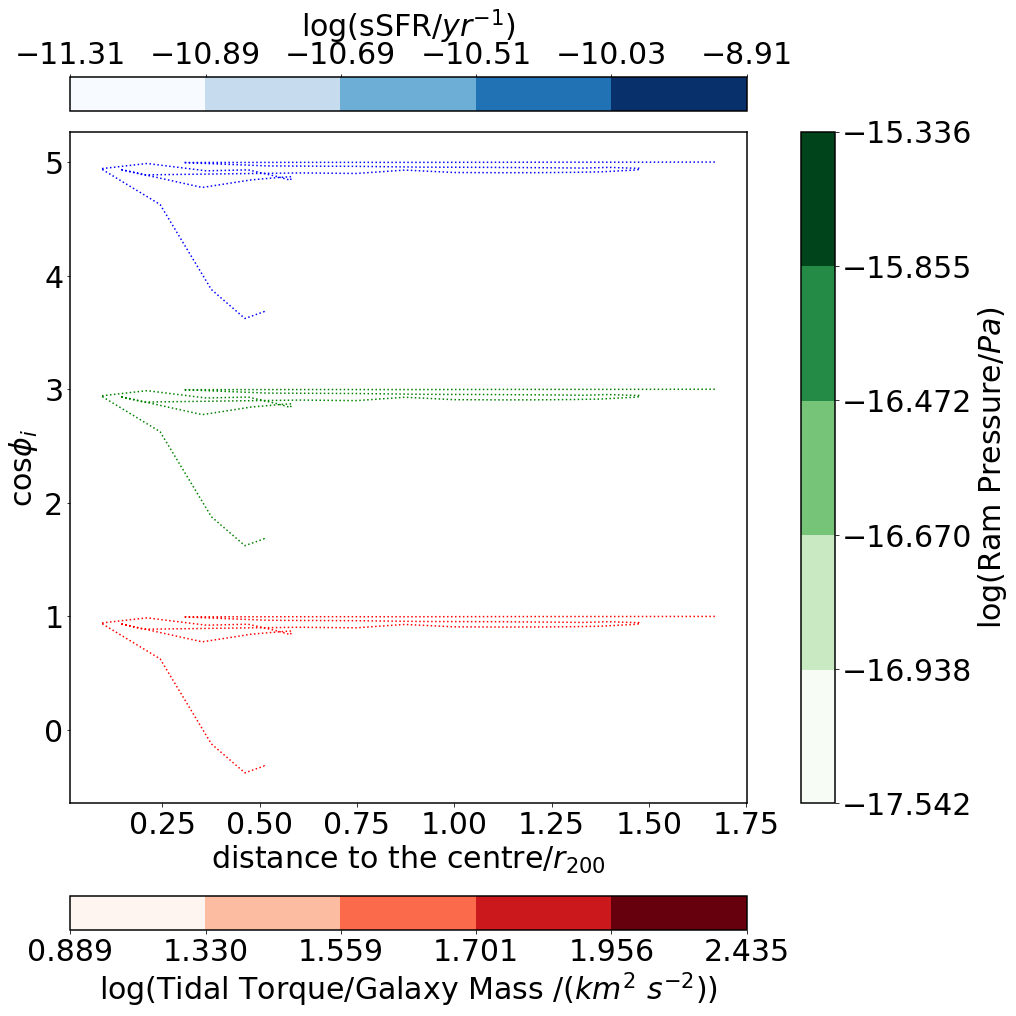

In [73]:

pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4343[:-1]/gMass_4343[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

ipos = np.where(deltaM_4343>0.)

pl.scatter(dist_4343[:-1], cosI_4343[:-1], s=np.abs(deltaM_4343/5e6), c=np.log10(TSt_4343[:-1]/gMass_4343[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(dist_4343[:-1], cosI_4343[:-1], ls=':', color='red')
pl.plot(dist_4343[:-1][ipos], cosI_4343[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4343[:-1]), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4343[:-1], cosI_4343[:-1]+2., s=np.abs(deltaM_4343/5e6), c=np.log10(RP_4343[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(dist_4343[:-1], cosI_4343[:-1]+2, ls=':', color='green')
pl.plot(dist_4343[:-1][ipos], cosI_4343[:-1][ipos]+2, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4343[:-1]/starMass_4343[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4343[:-1], cosI_4343[:-1]+4., s=np.abs(deltaM_4343/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(dist_4343[:-1], cosI_4343[:-1]+4, ls=':', color='blue')
pl.plot(dist_4343[:-1][ipos], cosI_4343[:-1][ipos]+4, marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('$\cos \phi_i$')
pl.xlabel('distance to the centre/$r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'distance to the centre/$r_{200}$')

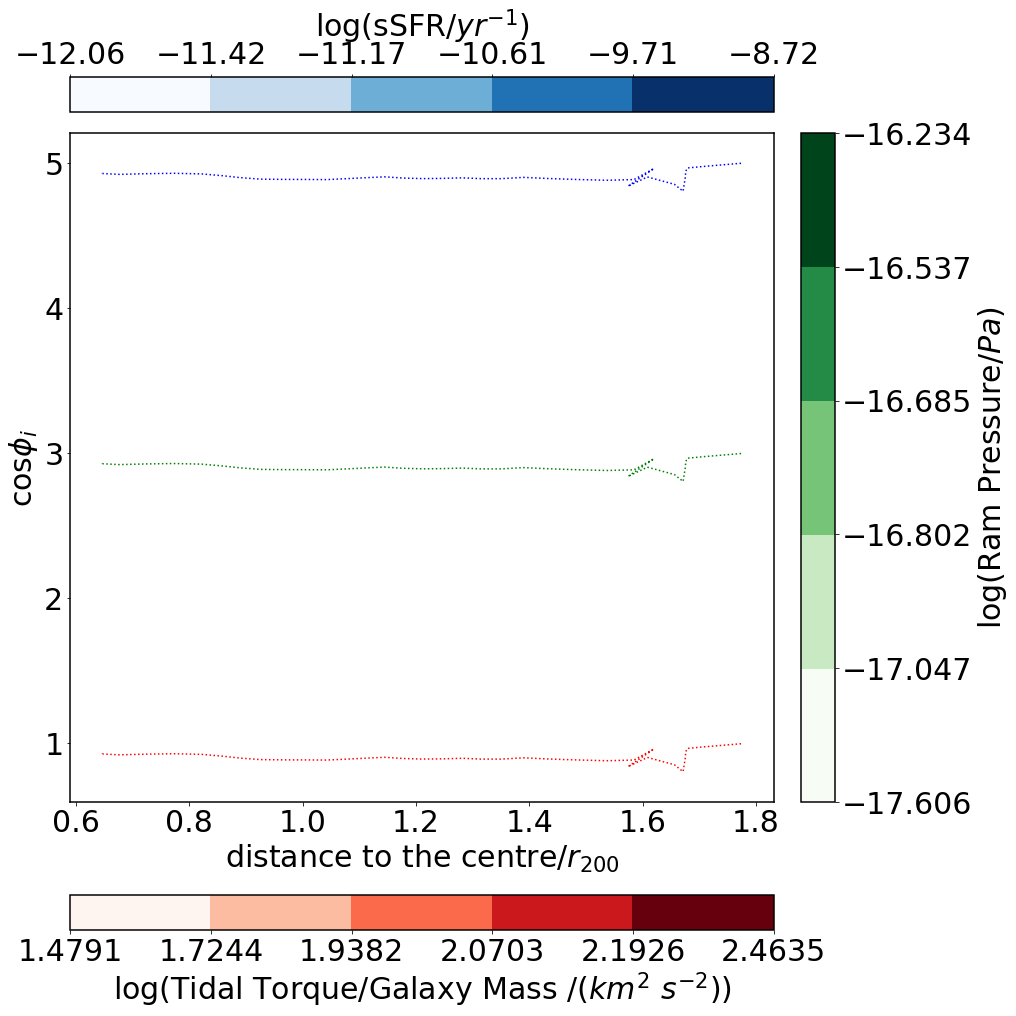

In [74]:

pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4470[:-1]/gMass_4470[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

ipos = np.where(deltaM_4470>0.)

pl.scatter(dist_4470[:-1], cosI_4470[:-1], s=np.abs(deltaM_4470/5e6), c=np.log10(TSt_4470[:-1]/gMass_4470[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(dist_4470[:-1], cosI_4470[:-1], ls=':', color='red')
pl.plot(dist_4470[:-1][ipos], cosI_4470[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4470[:-1]), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4470[:-1], cosI_4470[:-1]+2., s=np.abs(deltaM_4470/5e6), c=np.log10(RP_4470[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(dist_4470[:-1], cosI_4470[:-1]+2, ls=':', color='green')
pl.plot(dist_4470[:-1][ipos], cosI_4470[:-1][ipos]+2, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4470[:-1]/starMass_4470[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4470[:-1], cosI_4470[:-1]+4., s=np.abs(deltaM_4470/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(dist_4470[:-1], cosI_4470[:-1]+4, ls=':', color='blue')
pl.plot(dist_4470[:-1][ipos], cosI_4470[:-1][ipos]+4, marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('$\cos \phi_i$')
pl.xlabel('distance to the centre/$r_{200}$')

Text(0.5, 0, 'distance to the centre/$r_{200}$')

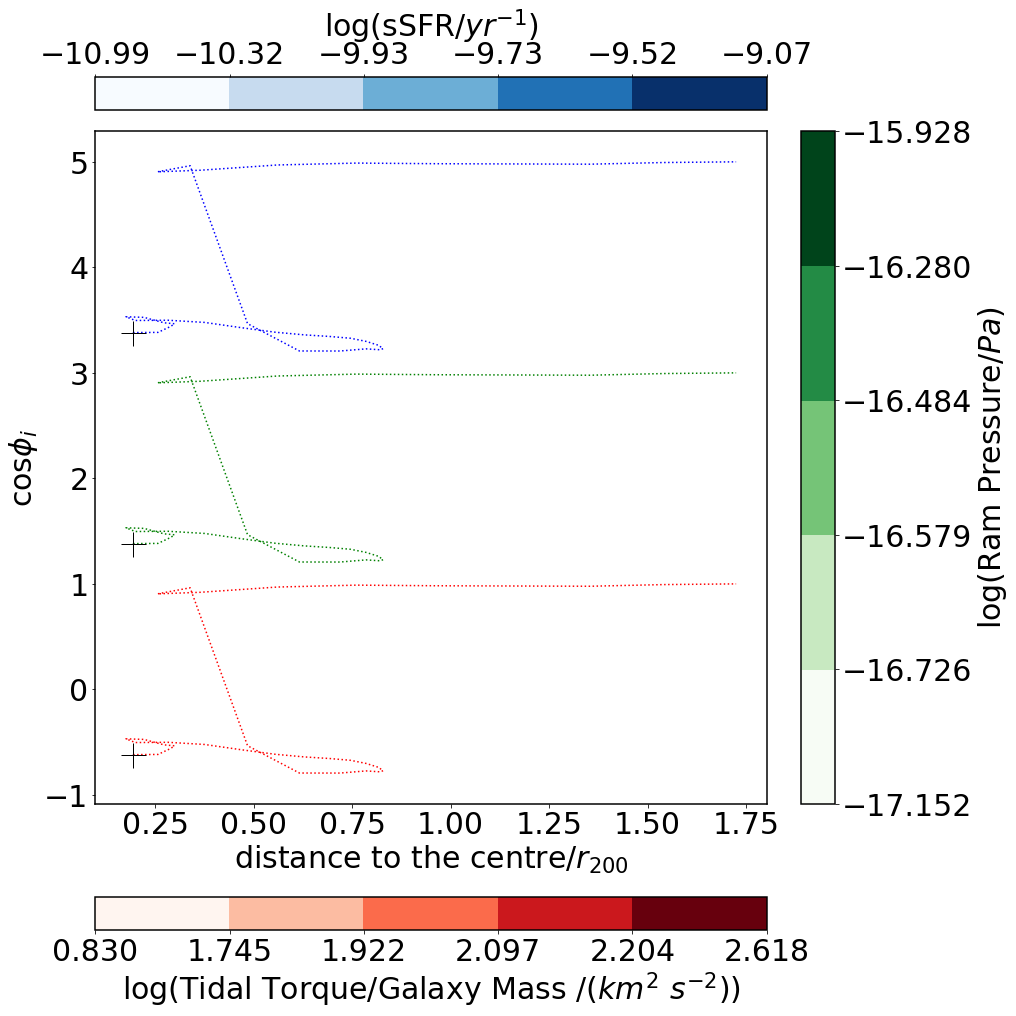

In [75]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4471[:-1]/gMass_4471[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

ipos = np.where(deltaM_4471>0.)

pl.scatter(dist_4471[:-1], cosI_4471[:-1], s=np.abs(deltaM_4471/5e6), c=np.log10(TSt_4471[:-1]/gMass_4471[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(dist_4471[:-1], cosI_4471[:-1], ls=':', color='red')
pl.plot(dist_4471[:-1][ipos], cosI_4471[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4471[:-1]), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4471[:-1], cosI_4471[:-1]+2., s=np.abs(deltaM_4471/5e6), c=np.log10(RP_4471[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(dist_4471[:-1], cosI_4471[:-1]+2, ls=':', color='green')
pl.plot(dist_4471[:-1][ipos], cosI_4471[:-1][ipos]+2, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4471[:-1]/starMass_4471[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4471[:-1], cosI_4471[:-1]+4., s=np.abs(deltaM_4471/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(dist_4471[:-1], cosI_4471[:-1]+4, ls=':', color='blue')
pl.plot(dist_4471[:-1][ipos], cosI_4471[:-1][ipos]+4, marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('$\cos \phi_i$')
pl.xlabel('distance to the centre/$r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'distance to the centre/$r_{200}$')

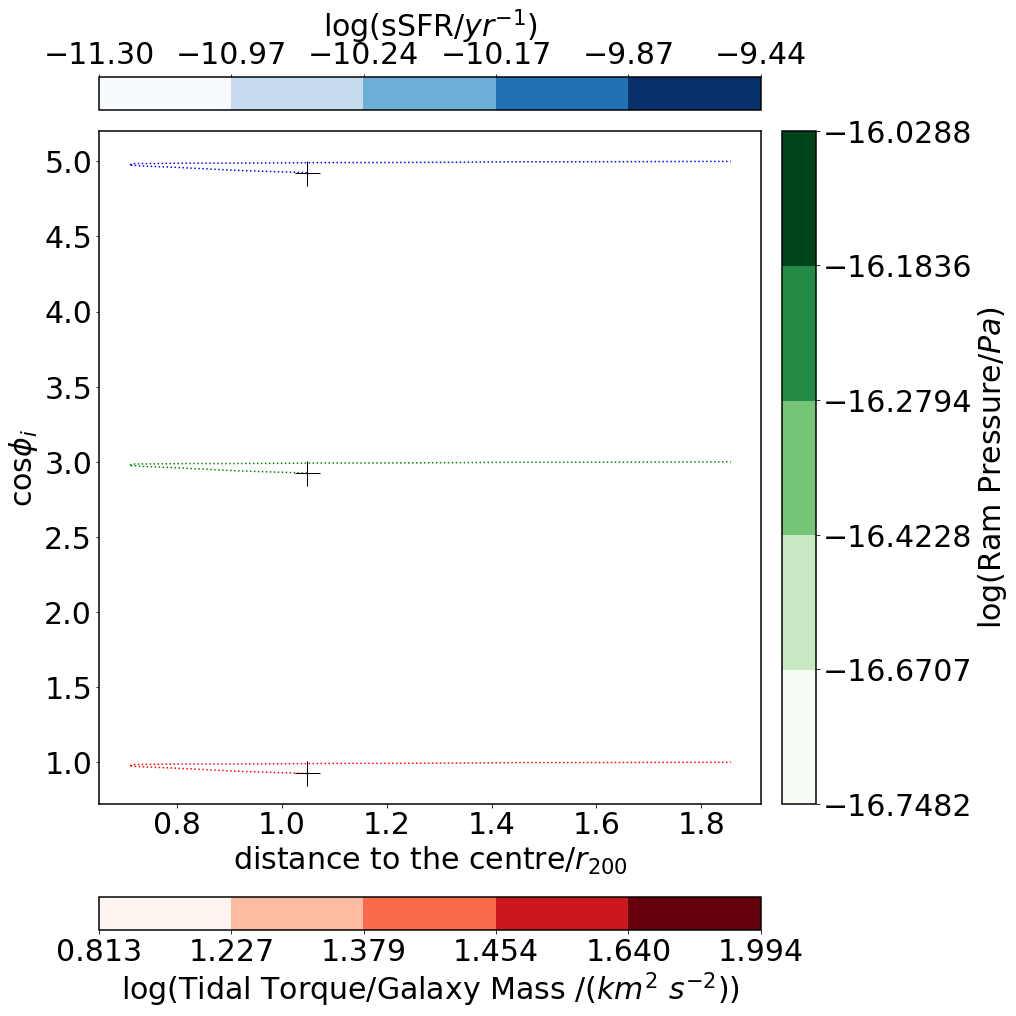

In [76]:

pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4473[:-1]/gMass_4473[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

ipos = np.where(deltaM_4473>0.)

pl.scatter(dist_4473[:-1], cosI_4473[:-1], s=np.abs(deltaM_4473/5e6), c=np.log10(TSt_4473[:-1]/gMass_4473[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(dist_4473[:-1], cosI_4473[:-1], ls=':', color='red')
pl.plot(dist_4473[:-1][ipos], cosI_4473[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4473[:-1]), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4473[:-1], cosI_4473[:-1]+2., s=np.abs(deltaM_4473/5e6), c=np.log10(RP_4473[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(dist_4473[:-1], cosI_4473[:-1]+2, ls=':', color='green')
pl.plot(dist_4473[:-1][ipos], cosI_4473[:-1][ipos]+2, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4473[:-1]/starMass_4473[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4473[:-1], cosI_4473[:-1]+4., s=np.abs(deltaM_4473/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(dist_4473[:-1], cosI_4473[:-1]+4, ls=':', color='blue')
pl.plot(dist_4473[:-1][ipos], cosI_4473[:-1][ipos]+4, marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('$\cos \phi_i$')
pl.xlabel('distance to the centre/$r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'distance to the centre/$r_{200}$')

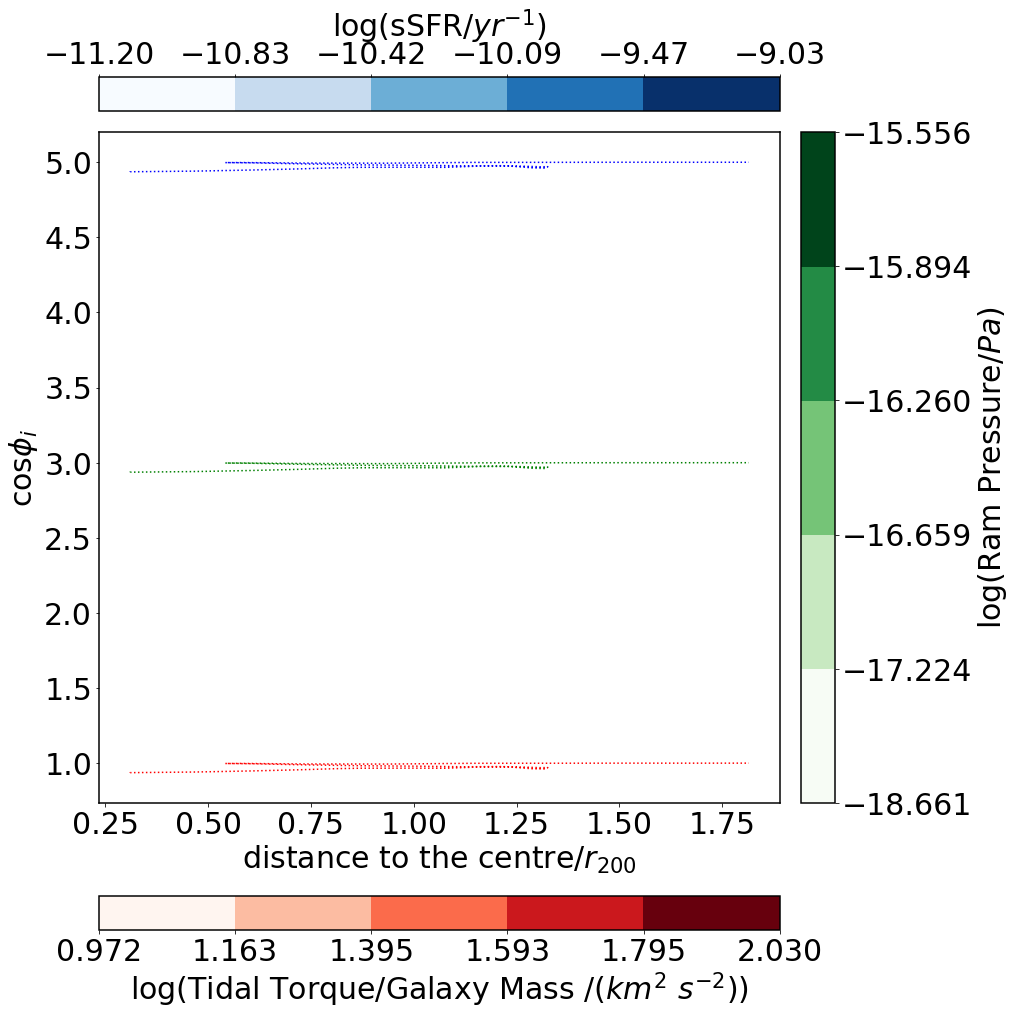

In [77]:

pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4474[:-1]/gMass_4474[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

ipos = np.where(deltaM_4474>0.)

pl.scatter(dist_4474[:-1], cosI_4474[:-1], s=np.abs(deltaM_4474/5e6), c=np.log10(TSt_4474[:-1]/gMass_4474[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(dist_4474[:-1], cosI_4474[:-1], ls=':', color='red')
pl.plot(dist_4474[:-1][ipos], cosI_4474[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4474[:-1]), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(dist_4474[:-1], cosI_4474[:-1]+2., s=np.abs(deltaM_4474/5e6), c=np.log10(RP_4474[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(dist_4474[:-1], cosI_4474[:-1]+2, ls=':', color='green')
pl.plot(dist_4474[:-1][ipos], cosI_4474[:-1][ipos]+2, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4474[:-1]/starMass_4474[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(dist_4474[:-1], cosI_4474[:-1]+4., s=np.abs(deltaM_4474/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(dist_4474[:-1], cosI_4474[:-1]+4, ls=':', color='blue')
pl.plot(dist_4474[:-1][ipos], cosI_4474[:-1][ipos]+4, marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('$\cos \phi_i$')
pl.xlabel('distance to the centre/$r_{200}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

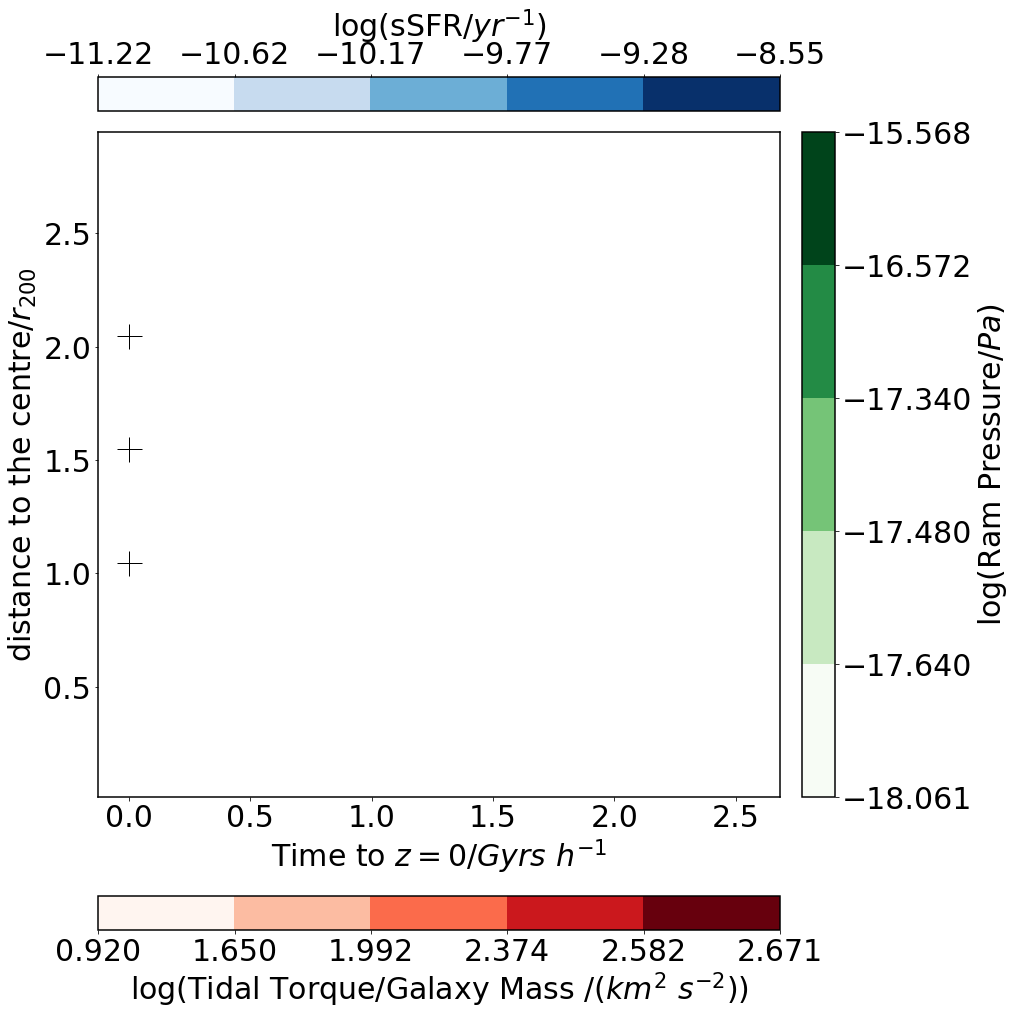

In [78]:
#lets take a time to see the same thing , but with all the other things

pl.figure(figsize=(14,14), constrained_layout=True)

ipos = np.where(deltaM_4338>0.)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(np.log10(TSt_4338[:-1]/gMass_4338[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4338[:-1], dist_4338[:-1], s=np.abs(deltaM_4338/5e6), c=np.log10(TSt_4338[:-1]/gMass_4338[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(Time_4338[:-1][ipos], dist_4338[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4338), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4338[:-1], dist_4338[:-1]+0.5, s=np.abs(deltaM_4338/5e6), c=np.log10(RP_4338[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(Time_4338[:-1][ipos], dist_4338[:-1][ipos]+0.5, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4338[:-1]/starMass_4338[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4338[:-1], dist_4338[:-1]+1., s=np.abs(deltaM_4338/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(Time_4338[:-1][ipos], dist_4338[:-1][ipos]+1., marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

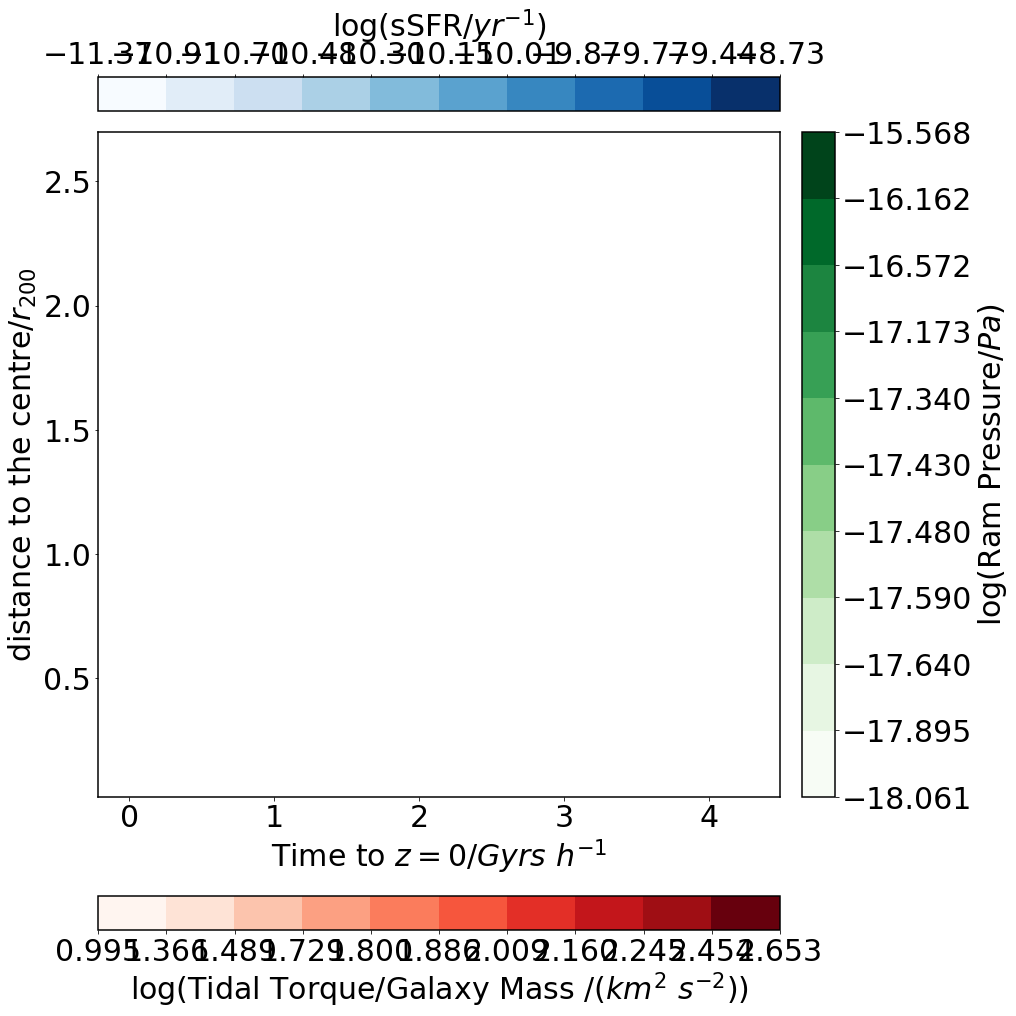

In [79]:
pl.figure(figsize=(14,14), constrained_layout=True)

ipos = np.where(deltaM_4339>0.)

vaper = np.linspace(0, 100, 11)
papels = np.percentile(np.log10(TSt_4339[:-1]/gMass_4339[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4339[:-1], dist_4339[:-1], s=np.abs(deltaM_4339/5e6), c=np.log10(TSt_4339[:-1]/gMass_4339[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(Time_4339[:-1][ipos], dist_4339[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4338), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4339[:-1], dist_4339[:-1]+0.5, s=np.abs(deltaM_4339/5e6), c=np.log10(RP_4339[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(Time_4339[:-1][ipos], dist_4339[:-1][ipos]+0.5, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4339[:-1]/starMass_4339[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4339[:-1], dist_4339[:-1]+1., s=np.abs(deltaM_4339/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(Time_4339[:-1][ipos], dist_4339[:-1][ipos]+1., marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

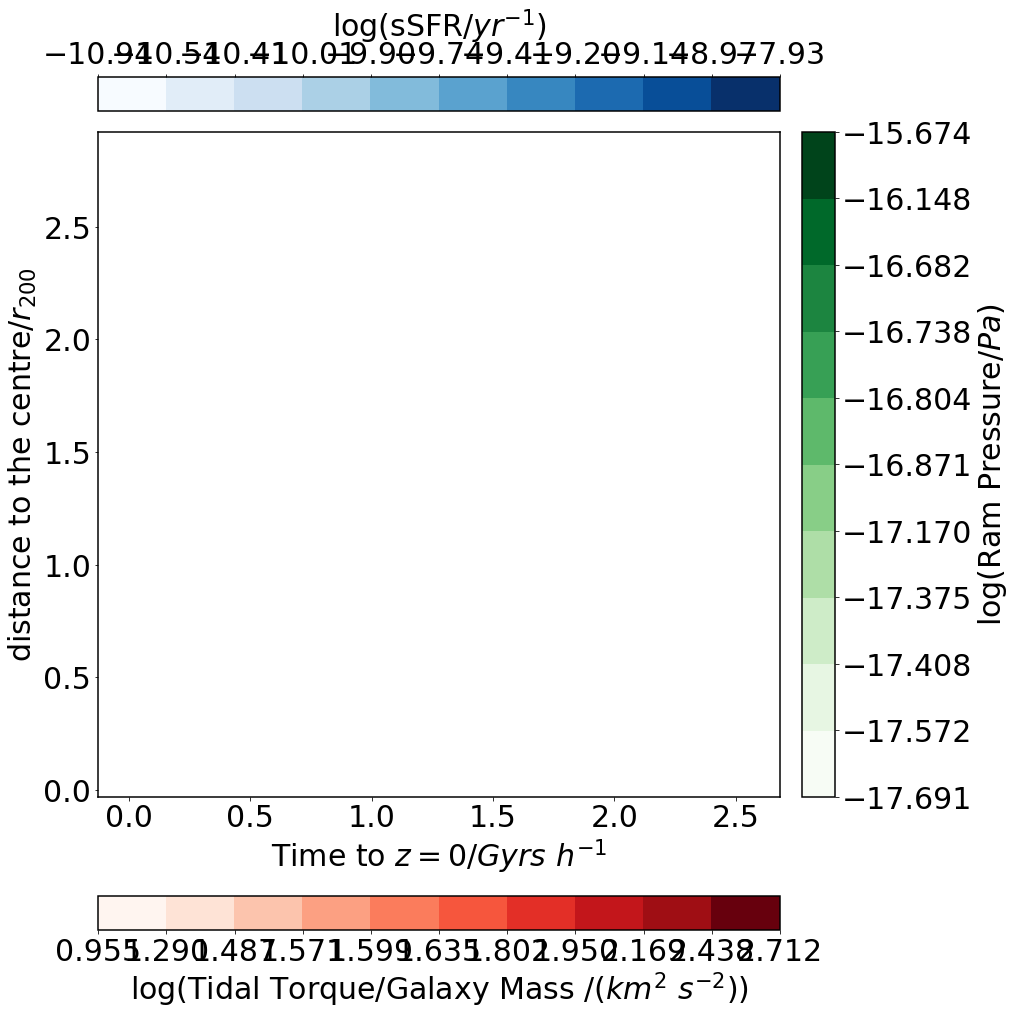

In [80]:
pl.figure(figsize=(14,14), constrained_layout=True)

ipos = np.where(deltaM_4341>0.)

vaper = np.linspace(0, 100, 11)
papels = np.percentile(np.log10(TSt_4341[:-1]/gMass_4341[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4341[:-1], dist_4341[:-1], s=np.abs(deltaM_4341/5e6), c=np.log10(TSt_4341[:-1]/gMass_4341[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(Time_4341[:-1][ipos], dist_4341[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4341), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4341[:-1], dist_4341[:-1]+0.5, s=np.abs(deltaM_4341/5e6), c=np.log10(RP_4341[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(Time_4341[:-1][ipos], dist_4341[:-1][ipos]+0.5, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4341[:-1]/starMass_4341[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4341[:-1], dist_4341[:-1]+1., s=np.abs(deltaM_4341/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(Time_4341[:-1][ipos], dist_4341[:-1][ipos]+1., marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

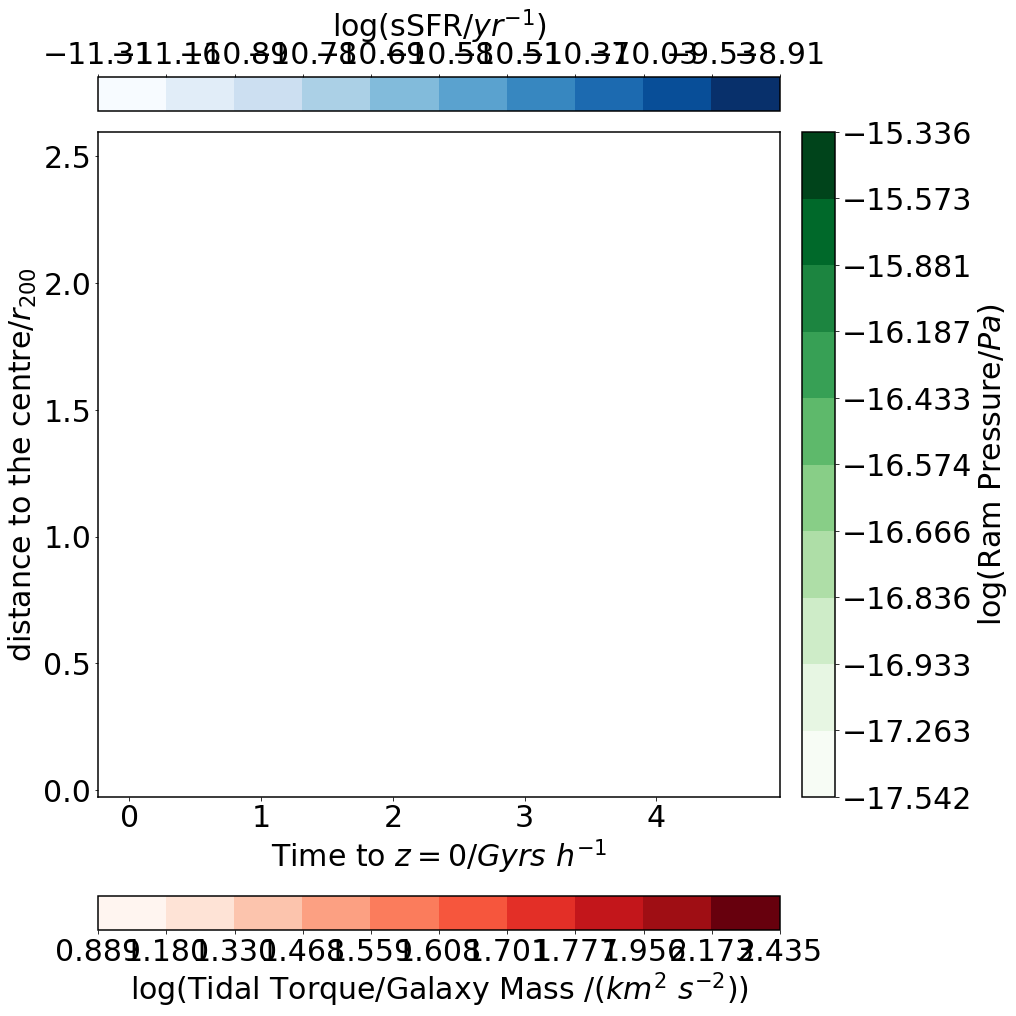

In [81]:
pl.figure(figsize=(14,14), constrained_layout=True)

ipos = np.where(deltaM_4343>0.)

vaper = np.linspace(0, 100, 11)
papels = np.percentile(np.log10(TSt_4343[:-1]/gMass_4343[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4343[:-1], dist_4343[:-1], s=np.abs(deltaM_4343/5e6), c=np.log10(TSt_4343[:-1]/gMass_4343[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(Time_4343[:-1][ipos], dist_4343[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4343), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4343[:-1], dist_4343[:-1]+0.5, s=np.abs(deltaM_4343/5e6), c=np.log10(RP_4343[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(Time_4343[:-1][ipos], dist_4343[:-1][ipos]+0.5, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4343[:-1]/starMass_4343[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4343[:-1], dist_4343[:-1]+1., s=np.abs(deltaM_4343/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(Time_4343[:-1][ipos], dist_4343[:-1][ipos]+1., marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

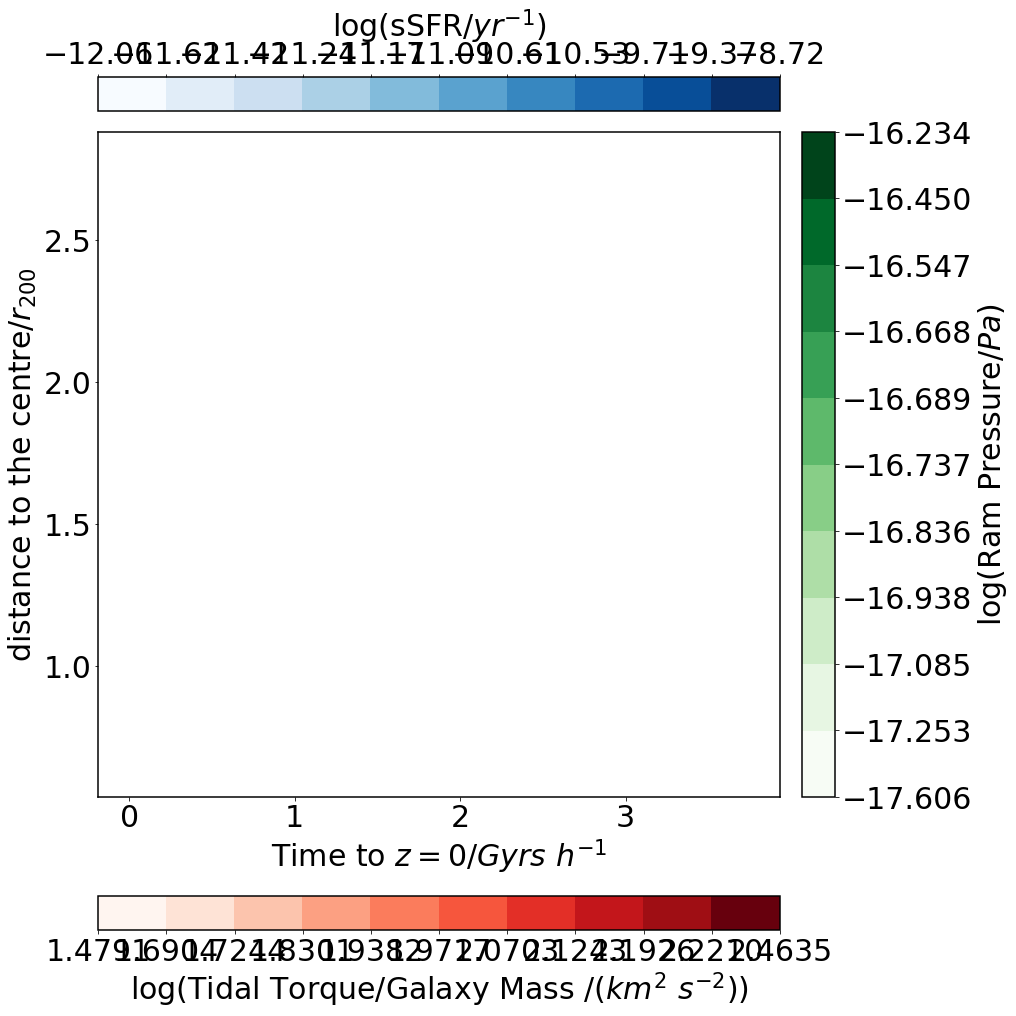

In [82]:
pl.figure(figsize=(14,14), constrained_layout=True)

ipos = np.where(deltaM_4470>0.)

vaper = np.linspace(0, 100, 11)
papels = np.percentile(np.log10(TSt_4470[:-1]/gMass_4470[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4470[:-1], dist_4470[:-1], s=np.abs(deltaM_4470/5e6), c=np.log10(TSt_4470[:-1]/gMass_4470[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(Time_4470[:-1][ipos], dist_4470[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4470), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4470[:-1], dist_4470[:-1]+0.5, s=np.abs(deltaM_4470/5e6), c=np.log10(RP_4470[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(Time_4470[:-1][ipos], dist_4470[:-1][ipos]+0.5, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4470[:-1]/starMass_4470[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4470[:-1], dist_4470[:-1]+1., s=np.abs(deltaM_4470/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(Time_4470[:-1][ipos], dist_4470[:-1][ipos]+1., marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

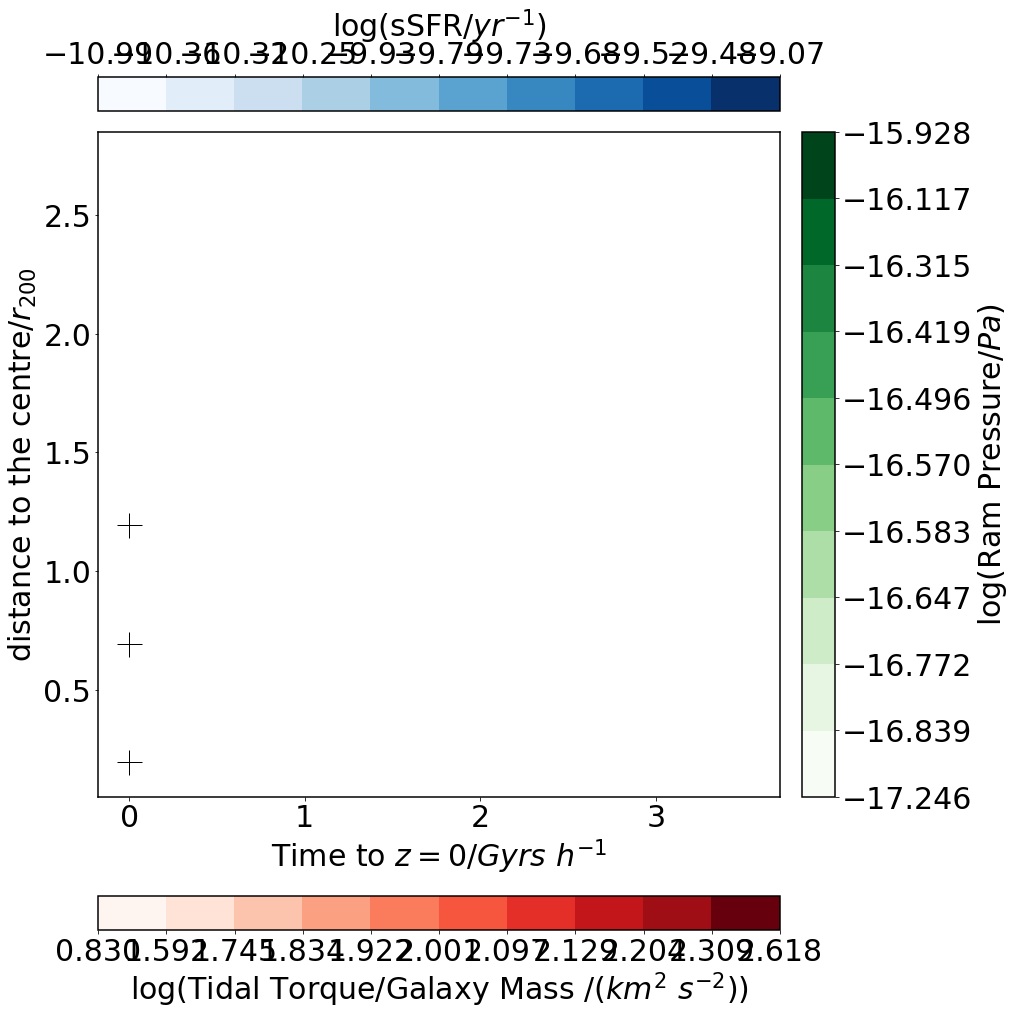

In [83]:
pl.figure(figsize=(14,14), constrained_layout=True)

ipos = np.where(deltaM_4471>0.)

vaper = np.linspace(0, 100, 11)
papels = np.percentile(np.log10(TSt_4471[:-1]/gMass_4471[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4471[:-1], dist_4471[:-1], s=np.abs(deltaM_4471/5e6), c=np.log10(TSt_4471[:-1]/gMass_4471[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(Time_4471[:-1][ipos], dist_4471[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4471), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4471[:-1], dist_4471[:-1]+0.5, s=np.abs(deltaM_4471/5e6), c=np.log10(RP_4471[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(Time_4471[:-1][ipos], dist_4471[:-1][ipos]+0.5, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4471[:-1]/starMass_4471[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4471[:-1], dist_4471[:-1]+1., s=np.abs(deltaM_4471/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(Time_4471[:-1][ipos], dist_4471[:-1][ipos]+1., marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

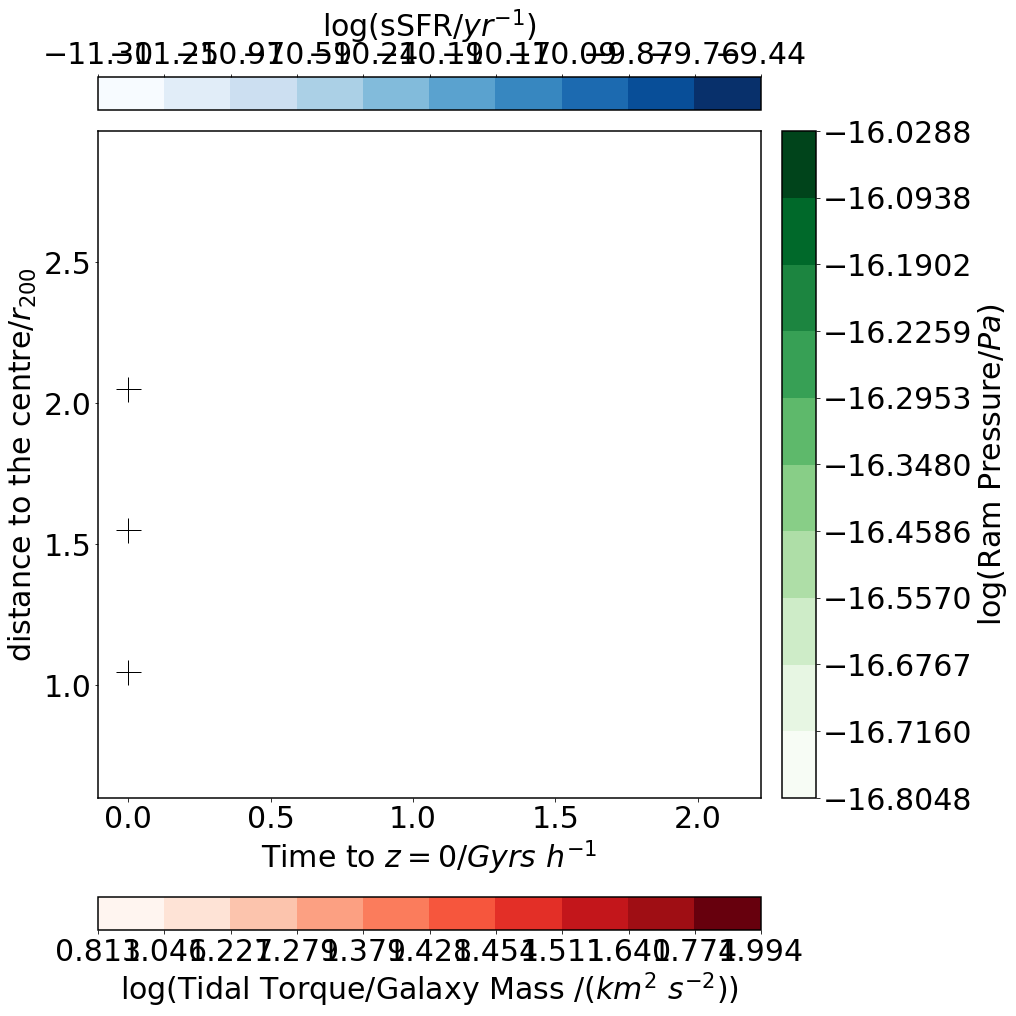

In [84]:
pl.figure(figsize=(14,14), constrained_layout=True)

ipos = np.where(deltaM_4473>0.)

vaper = np.linspace(0, 100, 11)
papels = np.percentile(np.log10(TSt_4473[:-1]/gMass_4473[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4473[:-1], dist_4473[:-1], s=np.abs(deltaM_4473/5e6), c=np.log10(TSt_4473[:-1]/gMass_4473[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(Time_4473[:-1][ipos], dist_4473[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4473), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4473[:-1], dist_4473[:-1]+0.5, s=np.abs(deltaM_4473/5e6), c=np.log10(RP_4473[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(Time_4473[:-1][ipos], dist_4473[:-1][ipos]+0.5, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4473[:-1]/starMass_4473[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4473[:-1], dist_4473[:-1]+1., s=np.abs(deltaM_4473/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(Time_4473[:-1][ipos], dist_4473[:-1][ipos]+1., marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Time to $z=0$/$Gyrs\\,\\,h^{-1}$')

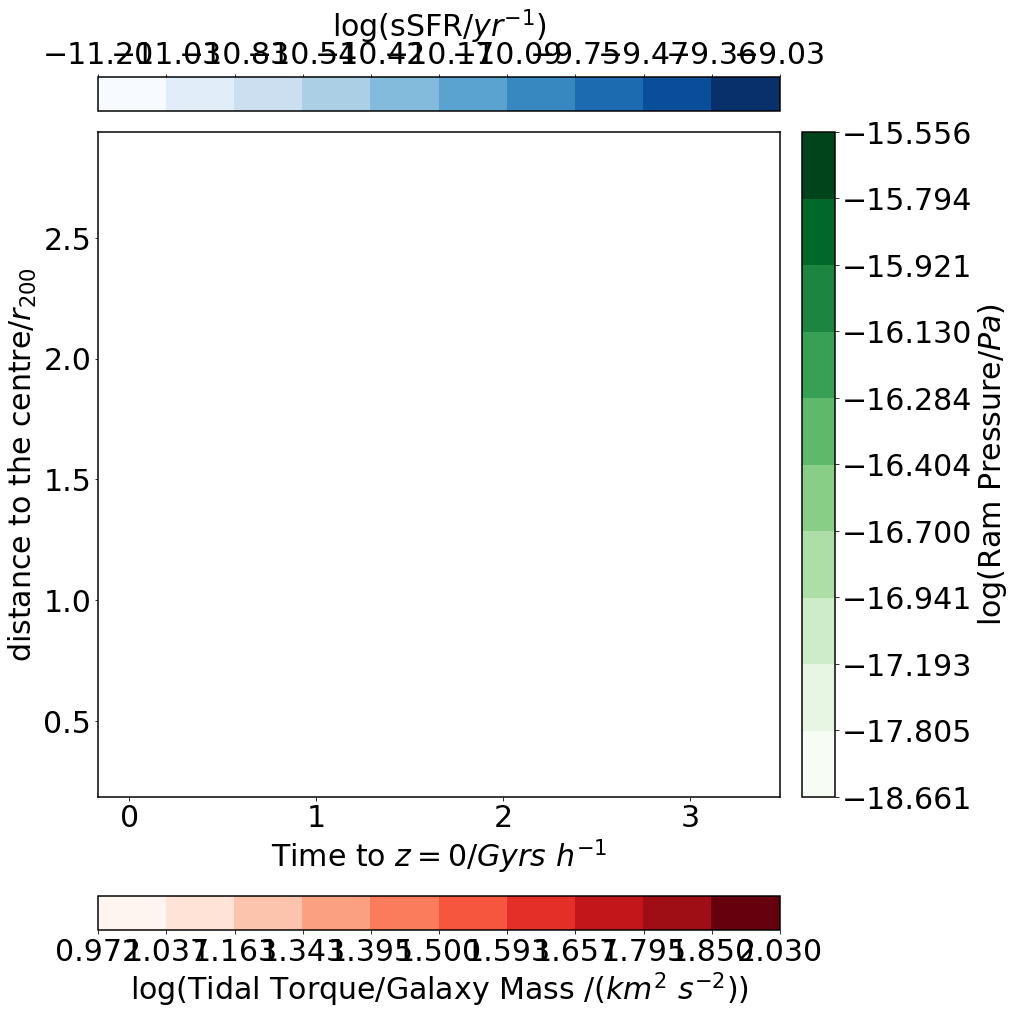

In [85]:
pl.figure(figsize=(14,14), constrained_layout=True)

ipos = np.where(deltaM_4474>0.)

vaper = np.linspace(0, 100, 11)
papels = np.percentile(np.log10(TSt_4474[:-1]/gMass_4474[:-1]), vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4474[:-1], dist_4474[:-1], s=np.abs(deltaM_4474/5e6), c=np.log10(TSt_4474[:-1]/gMass_4474[:-1]), norm=norm, cmap=cm.Reds)
pl.plot(Time_4474[:-1][ipos], dist_4474[:-1][ipos], marker='+' ,ls='', color='black', markersize=25)
barT = pl.colorbar(label='log(Tidal Torque/Galaxy Mass $/(km^2\,\,s^{-2})$)',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(np.log10(RP_4474), vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4474[:-1], dist_4474[:-1]+0.5, s=np.abs(deltaM_4474/5e6), c=np.log10(RP_4474[:-1]), norm=norm2, cmap=cm.Greens)
pl.plot(Time_4474[:-1][ipos], dist_4474[:-1][ipos]+0.5, marker='+' ,ls='', color='black', markersize=25)
barRP = pl.colorbar(label='$\log($Ram Pressure$/Pa)$', location='right')
barRP.set_ticks(papels2)

lsSFR = np.log10(SFR_4474[:-1]/starMass_4474[:-1])

inan = np.where((np.isnan(lsSFR)==False) & (np.isnan(lsSFR)==False) &(np.isinf(lsSFR)==False) & (np.isinf(lsSFR)==False))

papels3 = np.percentile(lsSFR[inan], vaper)
papels3 = papels3*100
papels3 = papels3.astype('int')
papels3 = papels3/100.
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4474[:-1], dist_4474[:-1]+1., s=np.abs(deltaM_4474/5e6), c=lsSFR, norm=norm3, cmap=cm.Blues)
pl.plot(Time_4474[:-1][ipos], dist_4474[:-1][ipos]+1., marker='+' ,ls='', color='black', markersize=25)
bar3 = pl.colorbar(label='$\log($sSFR$/yr^{-1})$', location='top')
bar3.set_ticks(papels3)

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/$Gyrs\,\,h^{-1}$')